<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />
Wine quality prediction using Machine Learning algorithms<br>
Rajesh Karedla

### Table of Contents
- 1. [Problem Statement](#section1)</br>
    - 1.1 [Description of the dataset](#section101)</br>
- 2. [Load the packages and data](#section2)</br>
- 3. [Data profiling](#section3)</br>
- 4. [Data normalization](#section4)</br>
    - 4.1 [Removing duplicate rows in data](#section401)</br>
    - 4.2 [Removing outliers in data](#section402)</br>
    - 4.3 [Feature engineering](#section403)</br>
    - 4.4 [Data profiling after preprocessing](#section404)</br>
- 5. [Exploratory data analysis](#section5)</br>
- 6. [Data Preparation](#section6)<br>
   - 6.1 [Dividing independent and target variables](#section601)<br>
   - 6.2 [Splitting data into train and test sets](#section602)<br>
   - 6.3 [Scaling the exploratory variables](#section603)<br>
- 7. [Comparing models](#section7)<br>
   - 7.1 [Tier-I models](#section701)<br>
   - 7.2 [Tier-II models](#section702)<br>
- 8. [Conclsion](#section8)</br>
    - 8.1 [Actionable insights](#section801)

<a id=section1></a> 
# 1. Problem Statement

<a id=section1></a> 
It is very difficult to assess the quality of wine just by reading the label. Quality is assessed best by tasting, but as we have dataset which contains different ingredient of wine and also we have Quality of Wine column. So based on that we will try to find out what should be level of various ingredients to get the best quality of wine.

###### <a id=section101></a> 
## 1.1 Description of the dataset 

This dataset provides information about wine's ingredient like citric acid, chlorides, sulfur dioxide, density,
PH, alcohol etc.<br>

| Column Name          | Description                                                                                       |
| ---------------------|:-------------------------------------------------------------------------------------------------:|
| fixed acidity        | most acids involved with wine or fixed or nonvolatile (do not evaporate readily).                 |
| volatile acidity     | the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant,         |
|                      | vinegar taste.                                                                                    |
| citric acid          | found in small quantities, citric acid can add ‘freshness’ and flavor to wines                    |
| residual sugar       | the amount of sugar remaining after fermentation stops, it’s rare to find wines with less         |
|                      | than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet.                |
| chlorides            | the amount of salt in the wine.                                                                   |
| free sulfur dioxide  | free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite   |
|                      | ion;it prevents microbial growth and the oxidation of wine.                                       |
| total sulfur dioxide | amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, |
|                      | but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine     |
| density              | the density of wine is close to that of water depending on the percent alcohol and sugar content  |
| pH                   | describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most  |
|                      | wines are between 3-4 on the pH scale.                                                            |
| sulphates            | a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an          |
|                      | antimicrobial and antioxidant.                                                                    |
| alcohol              | the percent alcohol content of the wine.                                                          |
| quality              | score between 0 to 10.                                                                            |


<a id=section2></a> 
# 2. Load the packages and data

In [1]:
# Basic libraries
import numpy as np                                                
import pandas as pd                                                
import pandas_profiling
import matplotlib.pyplot as plt                                   
import seaborn as sns                                              
%matplotlib inline
sns.set()

# Advanced libraries
from pandas_profiling import ProfileReport 
from sklearn.feature_selection import SelectFromModel              
from yellowbrick.model_selection import FeatureImportances
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold 
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint as sp_randint

# Tier-I models
from sklearn.linear_model import LogisticRegression             
from sklearn.tree import DecisionTreeClassifier                 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Tier-II models
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier             
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
# Load data set
df_wine = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/winequality.csv')
df_wine.head()        #To study top 5 rows

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

<a id=section3></a> 
# 3. Data profiling

In [3]:
# Data info
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


<a id=section3></a>
The data has 6497 rows and 12 columns<br>
Data type of all parameters are float except quality which is an integer<br>
No missing data<br>
All are numerical columns and no categorical data.

In [4]:
# Summary statistics of data 
df_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

<a id=section3></a> 
All parameters are measured from wine where as quality is determined by wine expert<br>
No negitive values in data.<br>
Fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide and sulphates have outliers
as 75% percentile and max values<br>
are far from each other

In [5]:
# Checking for null or NaN values in data set 
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<a id=section3></a>
No null values in the data.

In [6]:
# Data profiling before preprocessing
#profile = pandas_profiling.ProfileReport(df_wine)
#profile.to_file("wine_before_preprocessing.html")

<a id=section3></a> 
Number of variables                  12<br>
Number of observations             6497<br>
No missing cells<br>
The data set has 1179(18.1%) duplicate rows<br>
Citric acid has 151 (2.3%) zeros<br>
All are numerical columns and no catergorical columns

<a id=section4></a>
## 4. Data normalization

<a id=section401></a>
## 4.1 Removing duplicate rows in data

In [7]:
# Checking the target variable
df_wine['quality'].value_counts().sort_index(0) # Understanding the targer variable

3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: quality, dtype: int64

In [8]:
# Understanding the shape of data
df_wine.shape

(6497, 12)

In [9]:
# Droping the duplicates
df_wine.drop_duplicates(keep='first',inplace=True)
df_wine.shape                # Check the shape after removing duplicate rows 

(5318, 12)

In [10]:
# Checking the target variable after removing duplicates
df_wine['quality'].value_counts().sort_index(0) 

3      30
4     206
5    1751
6    2323
7     855
8     148
9       5
Name: quality, dtype: int64

There were no duplicated in quality 3 and 9<br>
Most of the duplicates are in wine quality 5 and 6

<a id=section402></a>
## 4.2 Removing outliers in data

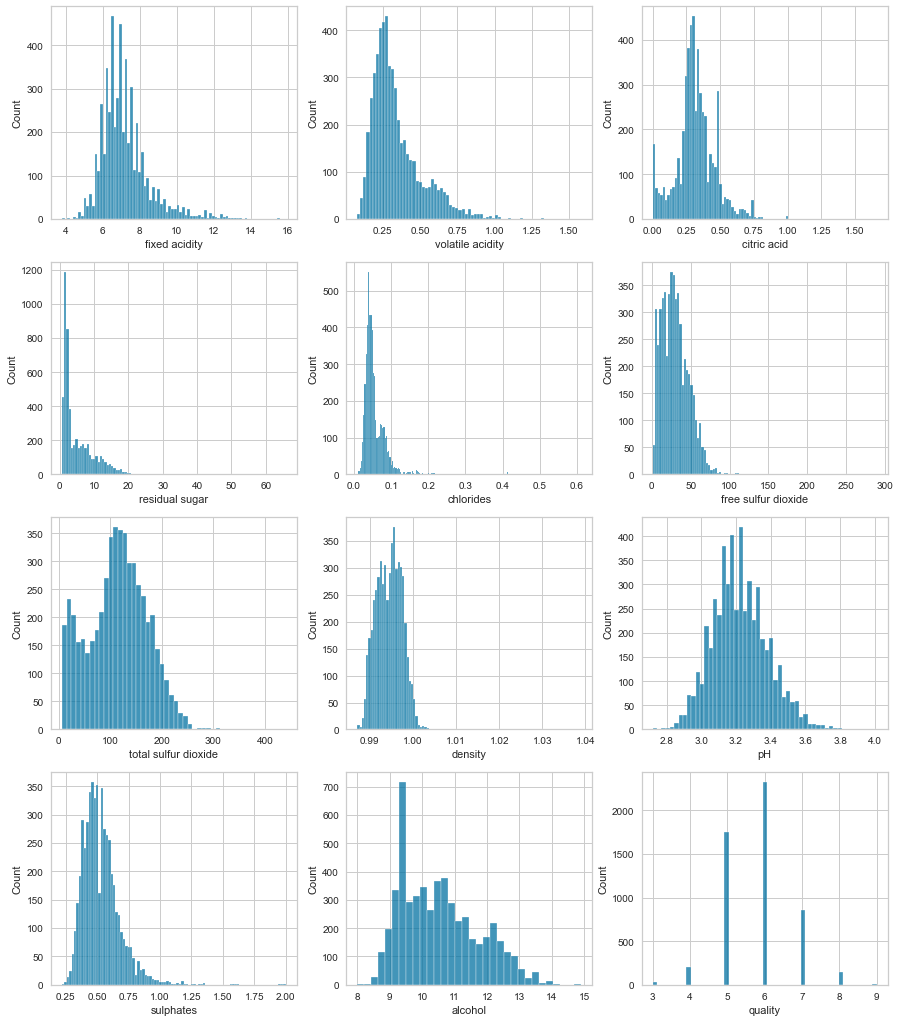

In [11]:
# Understanding the distribution of all variables
fig, axes = plt.subplots(nrows=4, ncols=3,figsize=(15,18))
for i, column in enumerate(df_wine.columns):
    sns.histplot(df_wine[column],ax=axes[i//3,i%3])

<a id=section402></a>
All the parameters are right skewed

<a id=section402></a>
### Removal of outliers using Inter Quartile Range

In [12]:
# Checking the shape before removing outliers
df_wine.shape

(5318, 12)

In [13]:
# Checking target variable before removing outliers
df_wine['quality'].value_counts().sort_index(0)

3      30
4     206
5    1751
6    2323
7     855
8     148
9       5
Name: quality, dtype: int64

In [14]:
# Removing outliers uring inter quartile range
Q1 = df_wine.quantile(0.25)               # Finding the 25% quartile 
Q3 = df_wine.quantile(0.75)               # Finding the 75% quartile
IQR = Q3 - Q1                             # Calculating inter quartile range

In [15]:
# Removing extreeme values which are 3 times of IQR
df_wine = df_wine[~((df_wine < (Q1 - 3*IQR))|(df_wine > (Q3 + 3*IQR))).any(axis=1)]  
df_wine.shape   

(5058, 12)

In [16]:
# Checking the shape after removing outliers
df_wine.shape

(5058, 12)

In [17]:
# Checking the target variable after removing outliers
df_wine['quality'].value_counts().sort_index(0)

3      18
4     189
5    1645
6    2218
7     836
8     147
9       5
Name: quality, dtype: int64

<a id=section403></a>
## 4.3. Feature engineering

### Handling zeros in citric acid

In [18]:
# Checking for null values
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [19]:
# Checking zeros in data
(df_wine.loc[:,df_wine.columns != 'quality'] == 0).sum()

fixed acidity             0
volatile acidity          0
citric acid             121
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
dtype: int64

In [20]:
# Replacing zeros with NaN
df_wine['citric acid'] = df_wine['citric acid'].replace(0,np.nan)

df_wine.isnull().sum()

fixed acidity             0
volatile acidity          0
citric acid             121
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64

In [21]:
# Checking the data if zeros are relaced with NaN
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          NaN             1.9      0.076   
1            7.8              0.88          NaN             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66          NaN             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
5      9.4        5

In [22]:
# Droping null values
df_wine.dropna(inplace=True)

In [23]:
# Checking for null value after replacing them with KNN Imputer
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [24]:
df_wine.shape

(4937, 12)

In [25]:
df_wine['bonded sulfur dioxide'] = df_wine['total sulfur dioxide'] - df_wine['free sulfur dioxide']
df_wine['total acidity'] = df_wine['fixed acidity'] + df_wine['volatile acidity']

In [26]:
# Checking the data 
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
6            7.9              0.60         0.06             1.6      0.069   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
6                 15.0                  59.0   0.9964  3.30       0.46   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  bonded sulfur dioxide  total acidity  
2      9.8        5                   39.0           8.56  
3      9.8        6                   43.0          11.48  
6      9.4        5                   44.0           8.50  
8      9.5        7                    9.0           8.38  
9     10.5        5                   85.0           8.00

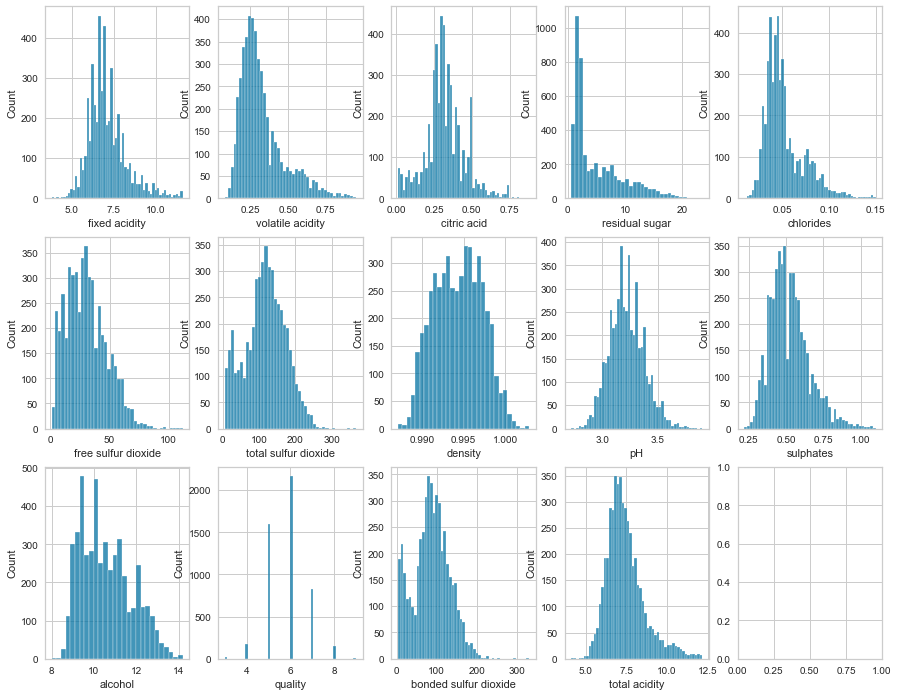

In [27]:
# Checking the distribution of parameters after removing outliers
fig, axes = plt.subplots(nrows=3, ncols=5,figsize=(15,12))
for i, column in enumerate(df_wine.columns):
    sns.histplot(df_wine[column],ax=axes[i//5,i%5])

<a id=section402></a>
All variables are normally distributed

In [28]:
# Descriptive statistics after data engineering
df_wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4937.000000       4937.000000  4937.000000     4937.000000   
mean        7.126929          0.327695     0.320113        5.171167   
std         1.142974          0.149622     0.129963        4.460090   
min         3.800000          0.080000     0.010000        0.600000   
25%         6.400000          0.225000     0.250000        1.800000   
50%         6.900000          0.290000     0.310000        2.800000   
75%         7.600000          0.390000     0.390000        7.700000   
max        11.600000          0.950000     0.880000       23.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4937.000000          4937.000000           4937.000000  4937.000000   
mean      0.051563            30.587503            117.540612     0.994368   
std       0.020980            16.891701             54.733290     0.002849   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.037000            17.000000             83.000000     0.992020   
50%       0.046000            29.000000            119.000000     0.994440   
75%       0.060000            41.000000            155.000000     0.996600   
max       0.150000           112.000000            366.500000     1.002890   

                pH    sulphates      alcohol      quality  \
count  4937.000000  4937.000000  4937.000000  4937.000000   
mean      3.222131     0.523148    10.571331     5.825805   
std       0.155915     0.131681     1.188669     0.873502   
min       2.720000     0.220000     8.000000     3.000000   
25%       3.120000     0.430000     9.500000     5.000000   
50%       3.210000     0.500000    10.400000     6.000000   
75%       3.320000     0.590000    11.400000     6.000000   
max       3.900000     1.100000    14.200000     9.000000   

       bonded sulfur dioxide  total acidity  
count            4937.000000    4937.000000  
mean               86.953109       7.454624  
std                44.360676       1.185646  
min                 3.000000       4.110000  
25%                59.000000       6.670000  
50%                87.000000       7.240000  
75%               116.000000       8.000000  
max               331.000000      12.180000

<a id=section402></a>
IQR for all parameters is very less thus they have very narrow range of values<br>

<a id=section404></a>
## 4.4 Data profiling after preprocessing

In [29]:
#profile = pandas_profiling.ProfileReport(df_wine)
#profile.to_file("wine_after_preprocessing.html")

<a id=section5></a>
## 5. Exploratory data analysis

### Correlation with heat map

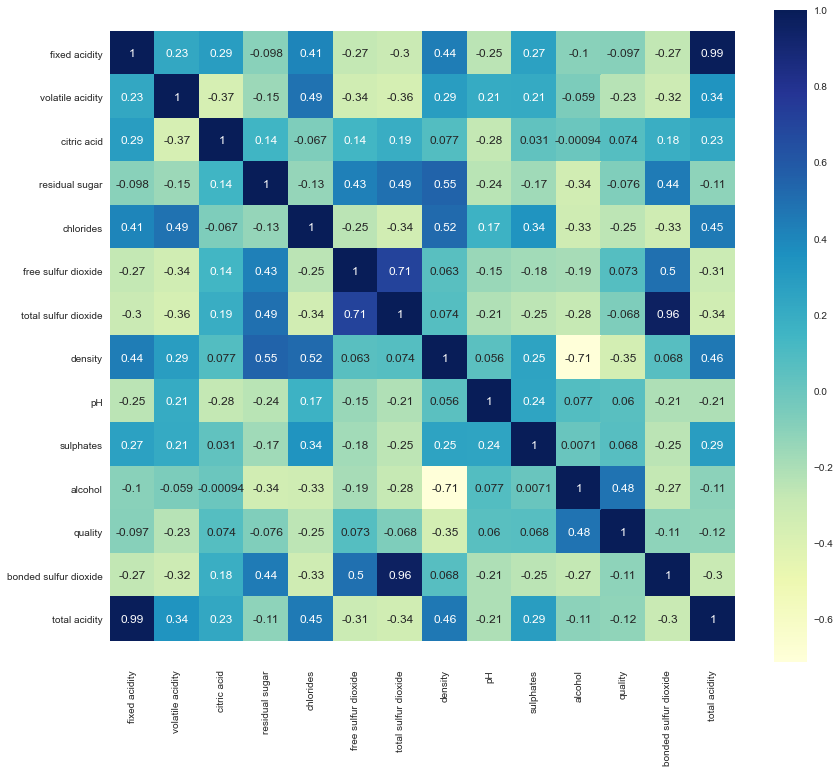

In [30]:
# Let us understand the correlation between variables
plt.figure(figsize=(14,12))                                # Size of graph
ax = sns.heatmap(df_wine.corr(),annot=True,cmap="YlGnBu")  # Heat map of Correlation matrix
bottom, top = ax.get_ylim()                                
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

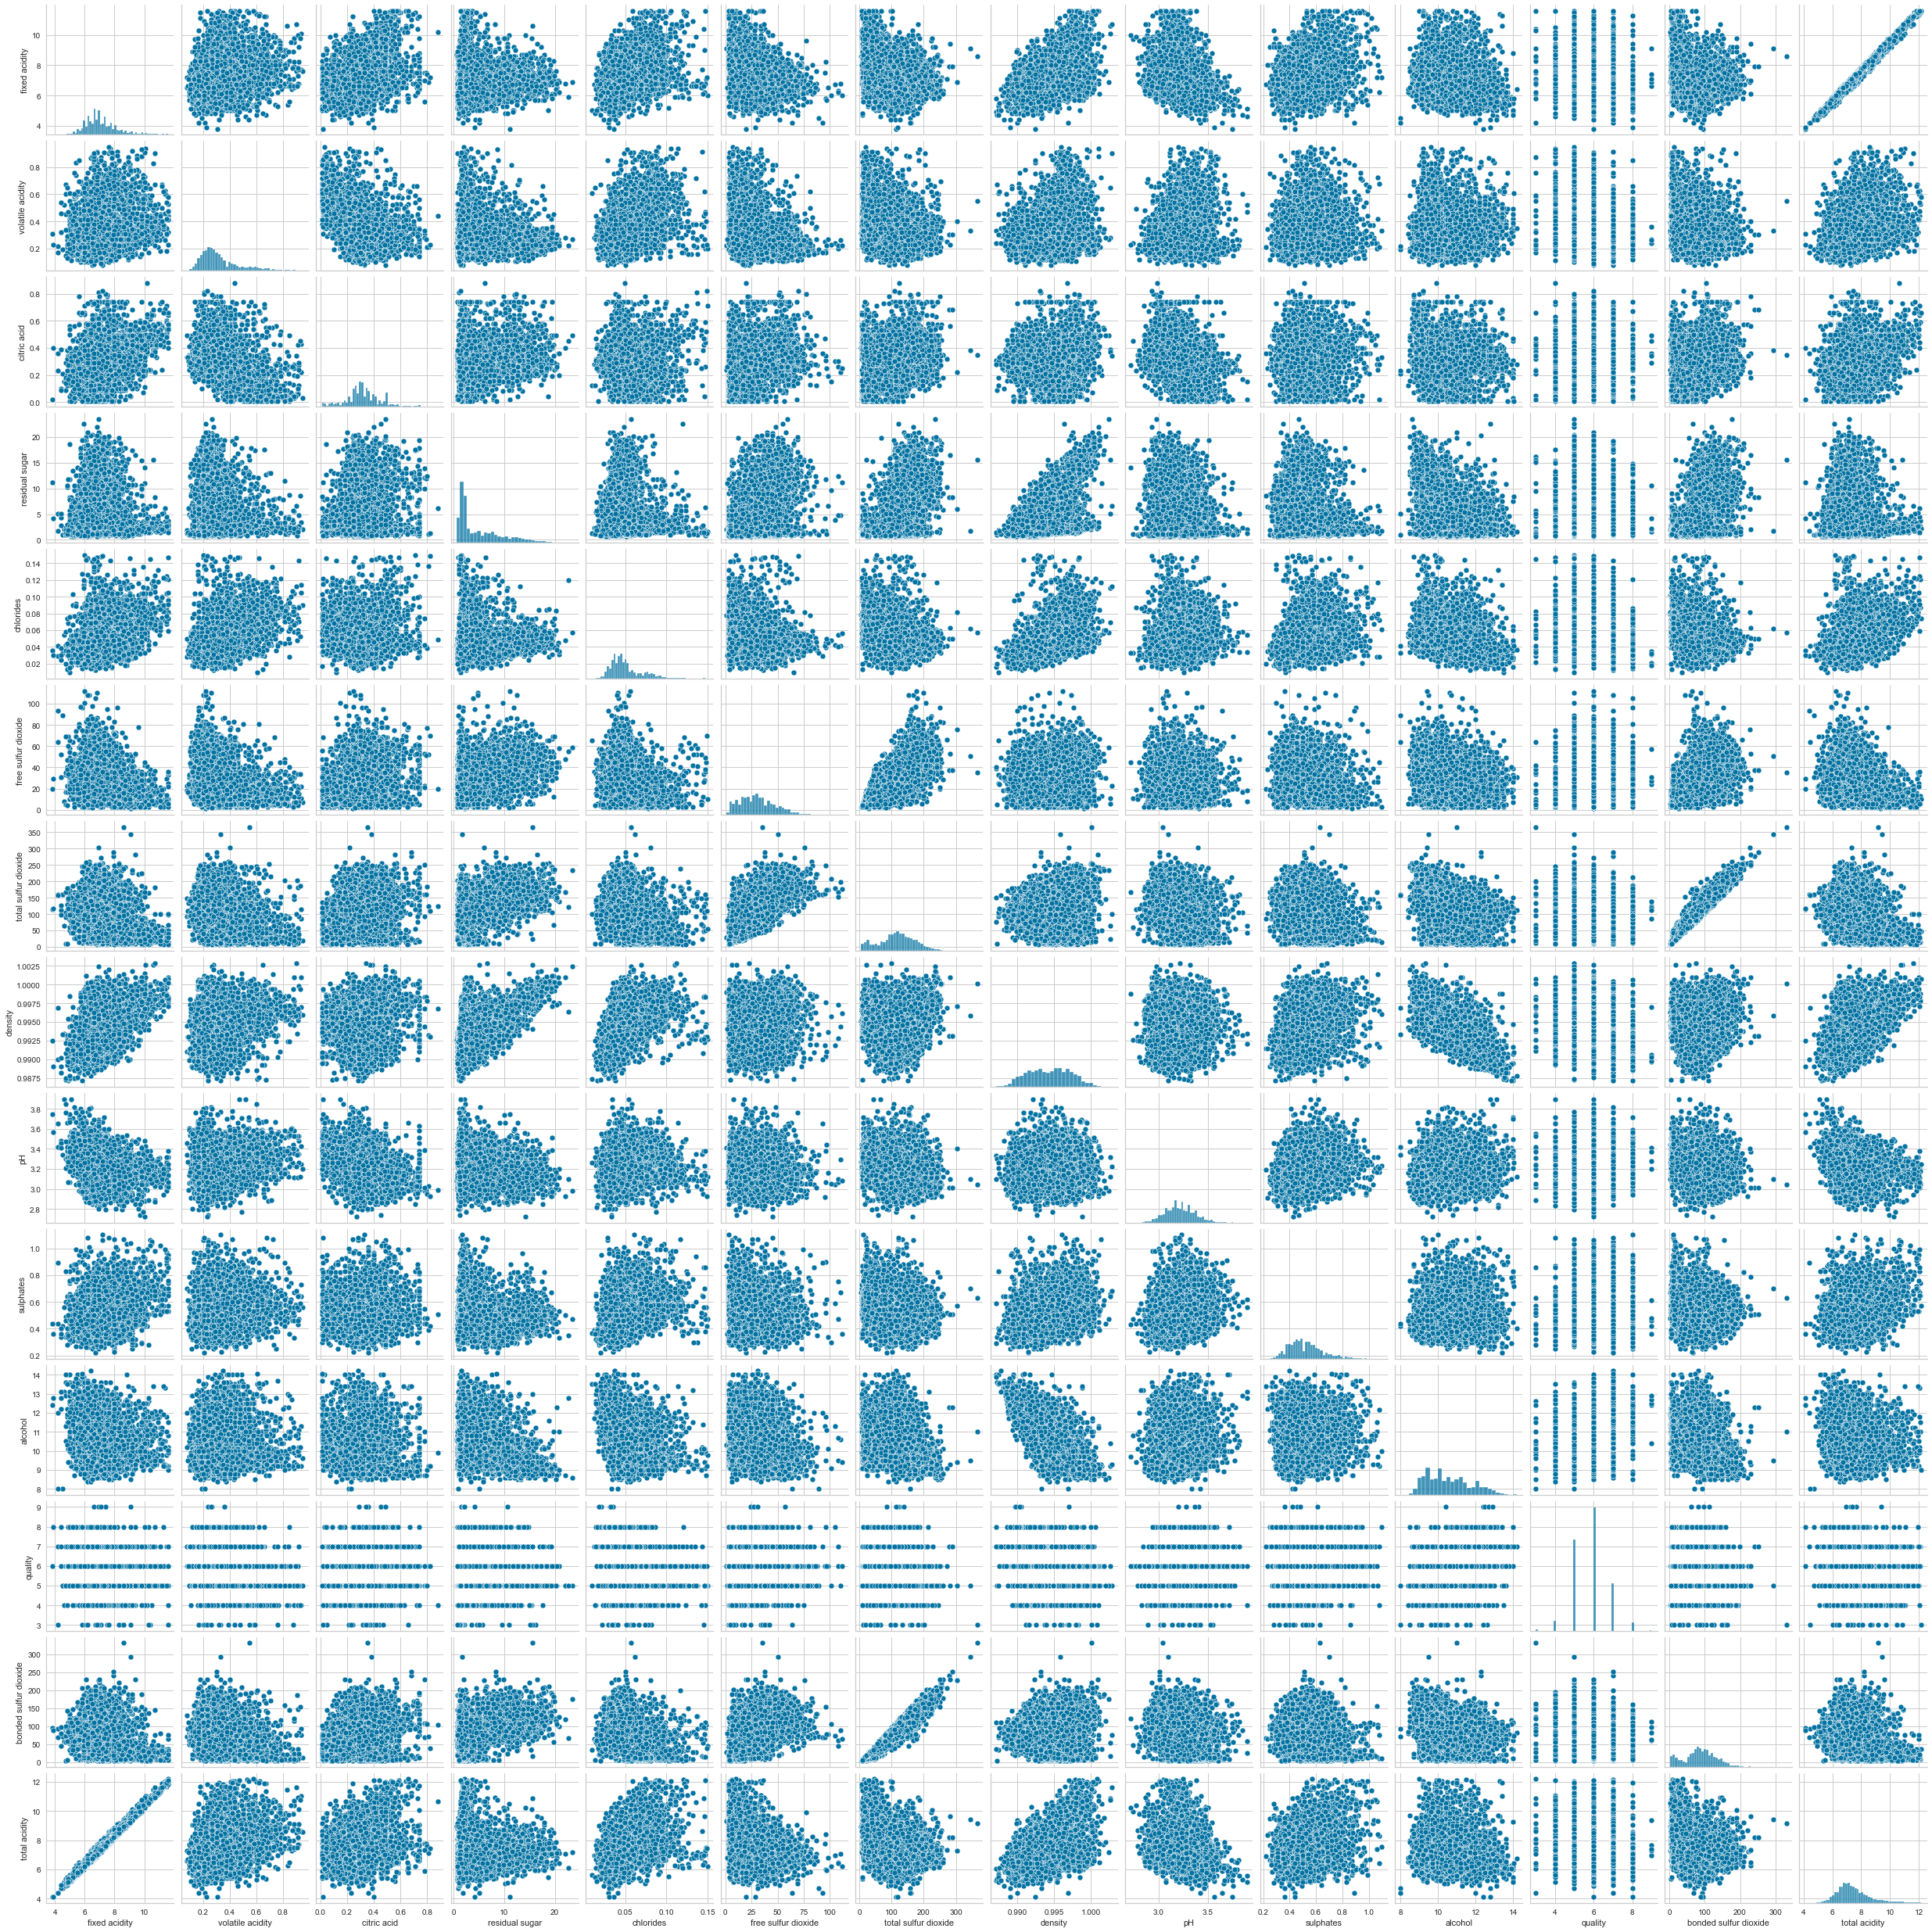

In [31]:
sns.pairplot(df_wine)

Fixed acidity and total acidity are highly correlated.<br>
Total sulfur dioxide and bonded sulfur dioxide are highly correlated.

In [32]:
df_wine.drop(['total sulfur dioxide', 'fixed acidity'], axis=1, inplace=True)

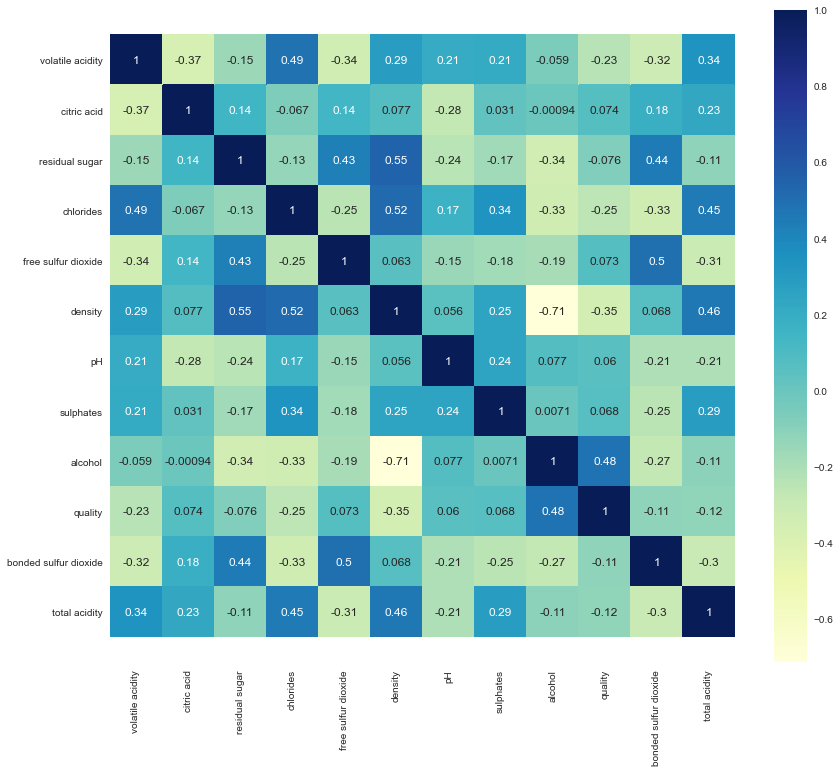

In [33]:
# Let us understand the correlation between variables
plt.figure(figsize=(14,12))                                # Size of graph
ax = sns.heatmap(df_wine.corr(),annot=True,cmap="YlGnBu")  # Heat map of Correlation matrix
bottom, top = ax.get_ylim()                                
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

<a id=section5></a>
None of the independent variables have high correlation with quality of wine<br>
There is no multicoliniarity among independent variables

### Target variable count by quality

In [34]:
# Understanding target variables
df_wine['quality'].value_counts().sort_index(0)

3      18
4     174
5    1596
6    2168
7     829
8     147
9       5
Name: quality, dtype: int64

<a id=section5></a>
Most of the wines are with quality 5 and 6

### Distribution of target variable

Text(0.5, 1.0, 'Distribution of Target Variable')

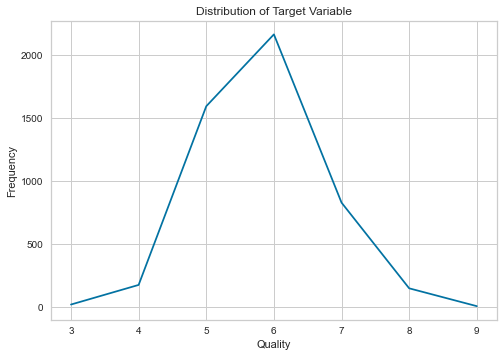

In [35]:
# Plotting target variable
df_wine['quality'].value_counts().sort_index(0).plot(kind='line')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')

<a id=section5></a>
The count of wine quality is normally distributed with median as 6.<br/>
Let us understand the correclation between wine quality and other parameters

### Correlation of target variable with independent variables

In [36]:
# Correlation of target variable with independent variables
corr=df_wine.corr()['quality']
corr[np.argsort(corr,axis=0)[::-1]]

quality                  1.000000
alcohol                  0.479353
citric acid              0.074093
free sulfur dioxide      0.072871
sulphates                0.067805
pH                       0.059640
residual sugar          -0.076060
bonded sulfur dioxide   -0.111762
total acidity           -0.122663
volatile acidity        -0.231615
chlorides               -0.251691
density                 -0.347820
Name: quality, dtype: float64

<a id=section5></a>
As per the correlation matrix:<br>
Wine quality has positive correlation with alcohol and <br>
negative correlation with density, chlorides, volatile acidity and total acidity

### Visualizing correlation of independent variables with target variable

<a id=section5></a>

Divided all variables into 3 themes:<br>
1. Sulfur parameters:<br>
    - Free sulfur dioxide<br>
    - Bonded sulfur dioxide<br>
    - Sulphates<br>
2. Acidity parameters:<br>
    - pH<br>
    - Total acidity<br>
    - Volatile acidity<br>
    - Citric acid<br>
3. Sensory parameters which you can see, feel and taste:<br>
    - alcohol<br>
    - residual sugar<br>
    - chlorides<br>
    - density

### Wine quality vs sulfur parameters

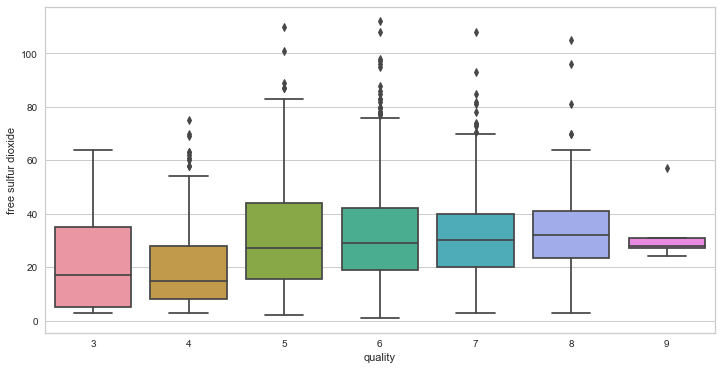

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(data =df_wine, x='quality', y='free sulfur dioxide', order=[3,4,5,6,7,8,9])

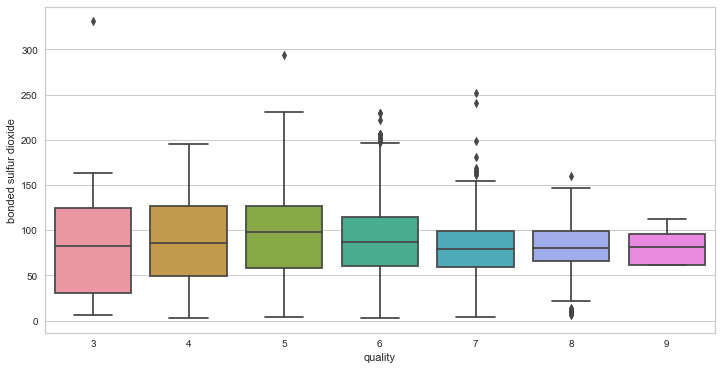

In [38]:
plt.figure(figsize=(12,6))
sns.boxplot(data =df_wine,x='quality', y='bonded sulfur dioxide', order=[3,4,5,6,7,8,9])

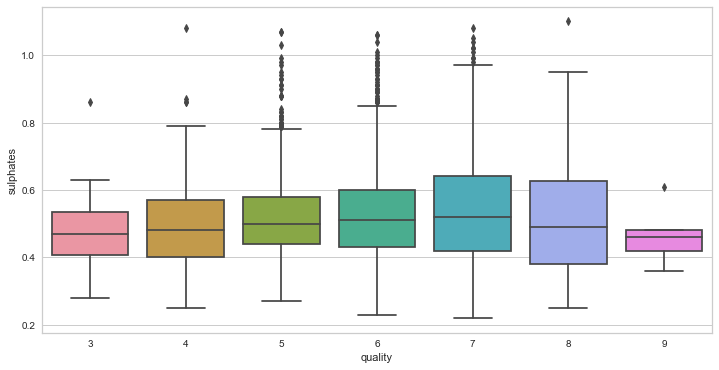

In [39]:
plt.figure(figsize=(12,6))
sns.boxplot(data =df_wine,x='quality', y='sulphates', order=[3,4,5,6,7,8,9])

Free sulfur dioxide shows some positive impact on quality of wine<br>
Sulphates and Total sulfur dioxide does not show any influence on quality of wine

### Wine quality vs acidity parameters

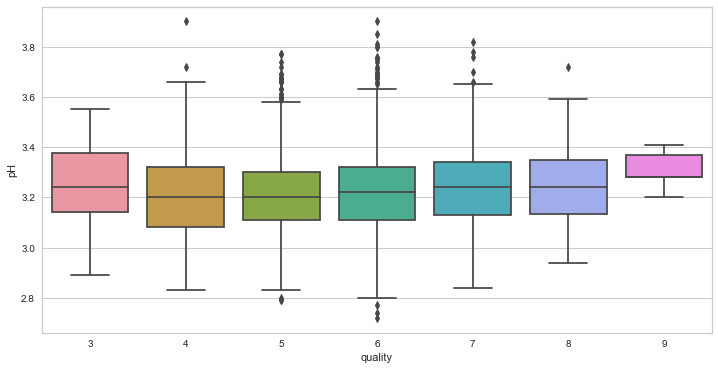

In [40]:
plt.figure(figsize=(12,6))
sns.boxplot(data =df_wine,x='quality', y='pH', order=[3,4,5,6,7,8,9])

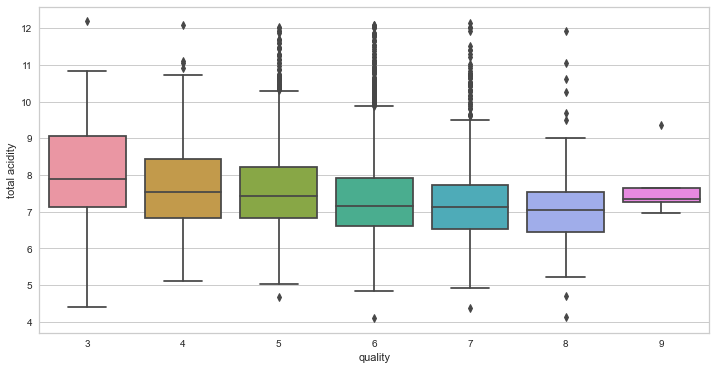

In [41]:
plt.figure(figsize=(12,6))
sns.boxplot(data =df_wine,x='quality', y='total acidity', order=[3,4,5,6,7,8,9])

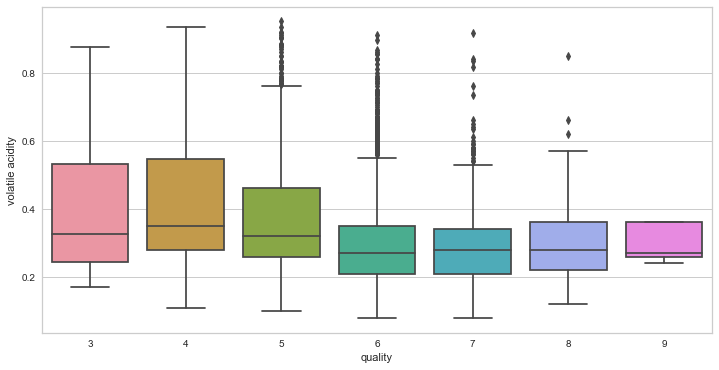

In [42]:
plt.figure(figsize=(12,6))
sns.boxplot(data =df_wine,x='quality', y='volatile acidity', order=[3,4,5,6,7,8,9])

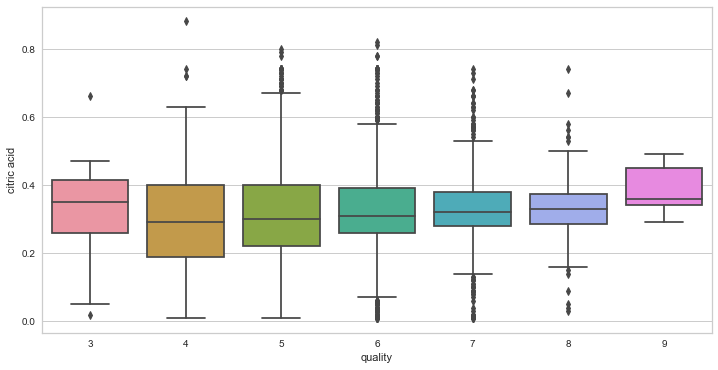

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(data =df_wine,x='quality', y='citric acid', order=[3,4,5,6,7,8,9])

pH and Volatile acidity does not have any influence on the quality of wine<br>
Total acidity shows inverse relationship with the quality of wine<br>
Citric acid has positive impact on quality of wine

### Wine quality vs sensory parameters

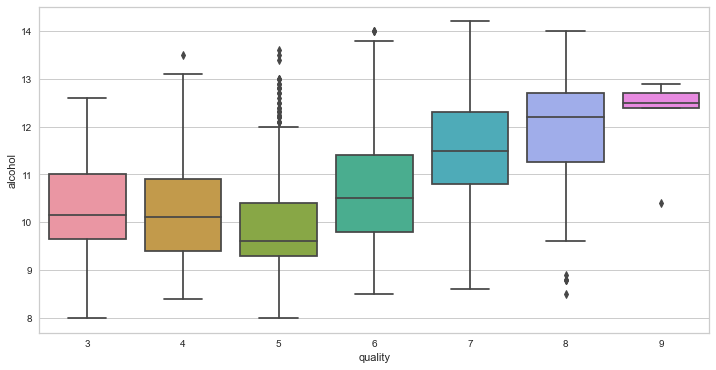

In [44]:
plt.figure(figsize=(12,6))
sns.boxplot(data =df_wine,x='quality', y='alcohol', order=[3,4,5,6,7,8,9])

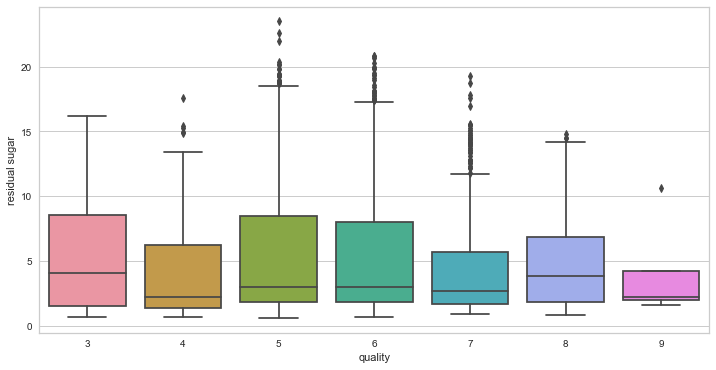

In [45]:
plt.figure(figsize=(12,6))
sns.boxplot(data =df_wine,x='quality', y='residual sugar', order=[3,4,5,6,7,8,9])

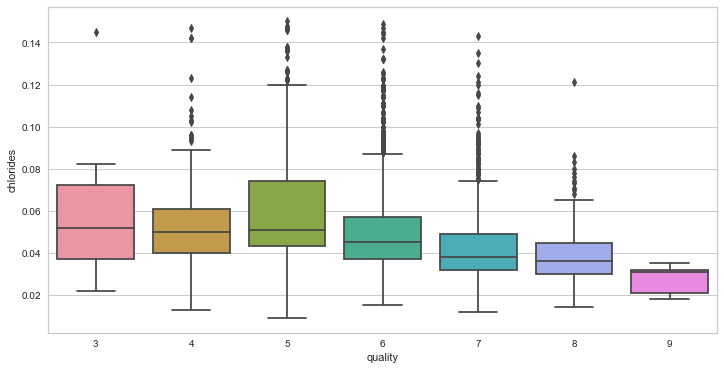

In [46]:
plt.figure(figsize=(12,6))
sns.boxplot(data =df_wine,x='quality', y='chlorides', order=[3,4,5,6,7,8,9])

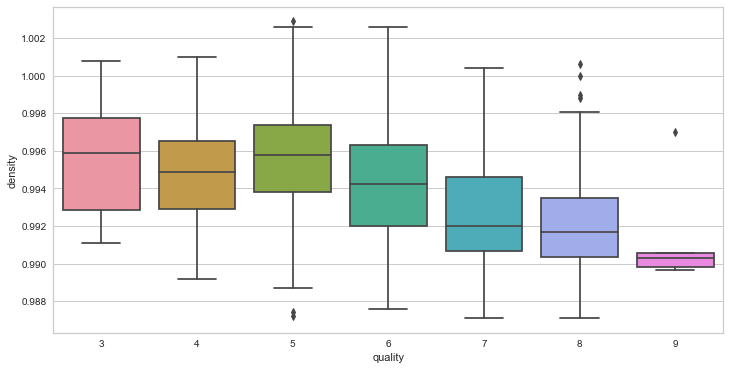

In [47]:
plt.figure(figsize=(12,6))
sns.boxplot(data =df_wine,x='quality', y='density', order=[3,4,5,6,7,8,9])

More alcohol content attributes to better wine quality<br>
Residual sugar does not have any impact on wine quality<br>
Wines with less chlorides and density are of better quality

<a id=section6></a>
# 6. Data preparation

In [48]:
# Coppying data into separate data frame
wine_quality = df_wine.copy()
wine_quality.head()

volatile acidity  citric acid  residual sugar  chlorides  \
2              0.76         0.04             2.3      0.092   
3              0.28         0.56             1.9      0.075   
6              0.60         0.06             1.6      0.069   
8              0.58         0.02             2.0      0.073   
9              0.50         0.36             6.1      0.071   

   free sulfur dioxide  density    pH  sulphates  alcohol  quality  \
2                 15.0   0.9970  3.26       0.65      9.8        5   
3                 17.0   0.9980  3.16       0.58      9.8        6   
6                 15.0   0.9964  3.30       0.46      9.4        5   
8                  9.0   0.9968  3.36       0.57      9.5        7   
9                 17.0   0.9978  3.35       0.80     10.5        5   

   bonded sulfur dioxide  total acidity  
2                   39.0           8.56  
3                   43.0          11.48  
6                   44.0           8.50  
8                    9.0           8.38  
9                   85.0           8.00

<a id=section601></a>
## 6.1 Dividing independent and target variables

In [49]:
# Defining X
X = wine_quality.loc[:,wine_quality.columns != 'quality']
X.head()

volatile acidity  citric acid  residual sugar  chlorides  \
2              0.76         0.04             2.3      0.092   
3              0.28         0.56             1.9      0.075   
6              0.60         0.06             1.6      0.069   
8              0.58         0.02             2.0      0.073   
9              0.50         0.36             6.1      0.071   

   free sulfur dioxide  density    pH  sulphates  alcohol  \
2                 15.0   0.9970  3.26       0.65      9.8   
3                 17.0   0.9980  3.16       0.58      9.8   
6                 15.0   0.9964  3.30       0.46      9.4   
8                  9.0   0.9968  3.36       0.57      9.5   
9                 17.0   0.9978  3.35       0.80     10.5   

   bonded sulfur dioxide  total acidity  
2                   39.0           8.56  
3                   43.0          11.48  
6                   44.0           8.50  
8                    9.0           8.38  
9                   85.0           8.00

In [50]:
# Understanding the shape and type of X
print(X.shape)
print(type(X))

(4937, 11)
<class 'pandas.core.frame.DataFrame'>


In [51]:
# Defining y
y=wine_quality.quality
y.head()

2    5
3    6
6    5
8    7
9    5
Name: quality, dtype: int64

In [52]:
# Understanding the shape and type of y
print(y.shape)
print(type(y))

(4937,)
<class 'pandas.core.series.Series'>


In [53]:
# Checking the imbalance in data set
y.value_counts().sort_index(0)

3      18
4     174
5    1596
6    2168
7     829
8     147
9       5
Name: quality, dtype: int64

### Feature selection

In [54]:
seed = 4
# Have some patience, may take some time :)
selector = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = seed))
selector.fit(X, y)

# Extracting list of important features
selected_feat = X.columns[(selector.get_support())].tolist()

# Show total number of important features extracted by the model
print('Total Features Selected are', len(selected_feat))

# Estimated by taking mean(default) of feature importance
print('Threshold set by Model:', np.round(selector.threshold_, decimals = 2))
print('Important Features:', selected_feat)

Total Features Selected are 4
Threshold set by Model: 0.09
Important Features: ['volatile acidity', 'density', 'alcohol', 'bonded sulfur dioxide']


C:\Users\rajes\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


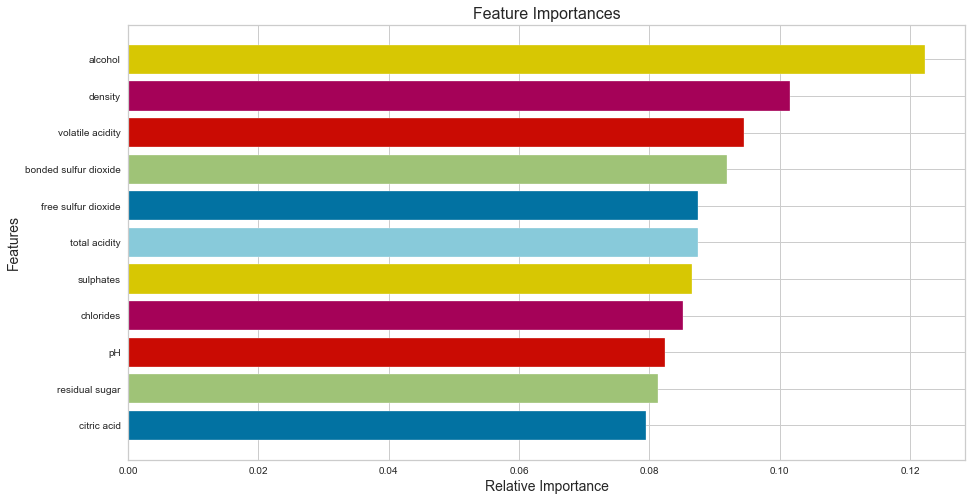

In [55]:
# Have some patience, may take some time :)
figure = plt.figure(figsize = [15, 8])

# If you don't want relative importance, use relative = False in below method
viz = FeatureImportances(selector.estimator, relative = False)
viz.fit(X, y)

plt.xlabel('Relative Importance', size = 14)
plt.ylabel('Features', size = 14)
plt.title(label = 'Feature Importances', size = 16)
plt.show()

Feature importance of all features are between 6.7% to 12.5%<br>
Alcohol, density, volatile acidity and bonded sulfur dioxide respectively contribute the most in predicting the quality of wine

In [56]:
# X = X.drop(['citric acid'], axis=1)

In [57]:
# Fixing imbalance in data set with SMOTE
smote = SMOTE(sampling_strategy='not majority', k_neighbors=4, random_state=seed)
X, y = smote.fit_sample(X, y)

y.value_counts().sort_index(0)

3    2168
4    2168
5    2168
6    2168
7    2168
8    2168
9    2168
Name: quality, dtype: int64

<a id=section602></a>
## 6.2 Splitting data into train and test sets

In [58]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=seed)

In [59]:
print(X_train.shape)
print(X_test.shape)

(12140, 11)
(3036, 11)


In [60]:
print(y_train.shape)
print(y_test.shape)

(12140,)
(3036,)


<a id=section603></a>
## 6.3 Scaling the exploratory variables

In [61]:
# Scaling the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)

In [62]:
# Transforming the data into standard scale
X_test=scaler.transform(X_test)

In [63]:
# Assigning the column names to scaled train data set
X_train = pd.DataFrame(data = X_train, columns = X.columns)
X_train.head()

volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.047645     0.112072       -0.782348  -1.158180   
1         -0.689413     0.333544       -0.717172  -0.804782   
2         -0.909718     0.337689        0.616630  -0.262185   
3          0.525639    -1.725462       -0.875274  -0.361500   
4          0.477287    -0.688917       -0.924516  -0.338320   

   free sulfur dioxide   density        pH  sulphates   alcohol  \
0            -0.145394 -1.380030  1.137950   0.448285  1.272719   
1            -0.057539 -1.130476  0.326233  -0.246902  1.268638   
2             0.484438  0.729124  0.134657   0.457187 -0.914909   
3            -1.071690 -0.541600  0.350808   0.123467 -0.354879   
4             0.642117 -1.169555  0.993089  -0.663133  1.231503   

   bonded sulfur dioxide  total acidity  
0              -0.407083      -0.440072  
1               0.582770       0.038472  
2               1.068907      -0.316541  
3              -0.720012      -1.179148  
4              -0.177875      -0.543561

In [64]:
# Assigning the column names to scaled test data set
X_test= pd.DataFrame(data = X_test, columns = X.columns)
X_test.head()

volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.575313     0.709750        0.588659  -0.690828   
1         -0.524622    -0.951780        0.976745   0.035760   
2          0.000509     1.369265        0.642353  -0.113213   
3         -0.540419     1.322089       -0.673729  -0.773749   
4          0.356676     0.066203       -0.528756   0.189598   

   free sulfur dioxide   density        pH  sulphates   alcohol  \
0            -0.038918  0.223816 -0.062477  -0.309035  0.250582   
1             1.604851  0.623231  0.062606  -0.794262 -0.594892   
2             2.040567  0.693827 -1.090199  -0.877692 -1.554944   
3             0.161257 -1.218555  0.935118  -0.667336  1.554249   
4            -1.484162  0.520707 -1.380006  -1.251548 -0.924531   

   bonded sulfur dioxide  total acidity  
0               0.415903       0.944142  
1               1.367060      -0.528942  
2               1.389995      -0.290533  
3              -0.068117      -0.196015  
4              -1.415532       1.832040

<a id=section7></a>

# 7. Comparing models

<a id=section701></a>

## 7.1 Creating Tier-I models

### Logistic Regression

In [65]:
# Initiating Logistic Regression
model1 = LogisticRegression(random_state=seed, max_iter=10000)

# Fitting the train data to models
model1.fit(X_train,y_train)

LogisticRegression(max_iter=10000, random_state=4)

In [66]:
# Predicting y for train data
y_pred_train1 = model1.predict(X_train)

# Predicting y for test data
y_pred_test1 = model1.predict(X_test)

In [67]:
# Calcutaing accuracy score for train data
print('Accuracy score for Logistic Regression model1 on train data is:', accuracy_score(y_train, y_pred_train1))

# Calcutaing accuracy score for train data
print('Accuracy score for Logistic Regression model1 on test data is:', accuracy_score(y_test, y_pred_test1))

Accuracy score for Logistic Regression model1 on train data is: 0.529159802306425
Accuracy score for Logistic Regression model1 on test data is: 0.5322793148880105


In [68]:
# Printing classification report
print('Classification report score for Logistic Regression model1 on test data is:', 
      classification_report(y_test, y_pred_test1, zero_division =0))

Classification report score for Logistic Regression model1 on test data is:               precision    recall  f1-score   support

           3       0.51      0.56      0.53       434
           4       0.47      0.50      0.48       434
           5       0.49      0.44      0.47       434
           6       0.33      0.27      0.30       434
           7       0.41      0.33      0.36       433
           8       0.51      0.63      0.56       434
           9       0.94      1.00      0.97       433

    accuracy                           0.53      3036
   macro avg       0.52      0.53      0.52      3036
weighted avg       0.52      0.53      0.52      3036



In [69]:
# Hyper parameter tuning of Logistic Regression model

# lr_model_tuned = LogisticRegression(max_iter=10000)

# def generate():
#     param_dist = [{'penalty':['elasticnet'], 'C':np.arange(0.1,1,0.1), 'solver':['saga'],
#                    'l1_ratio':np.arange(0.1,1,0.1), 'class_weight':['balanced', None],
#                    'multi_class':['ovr', 'multinomial']}]

    
#     model_lr = GridSearchCV(lr_model_tuned,
#                             param_grid=param_dist,     
#                             n_jobs=-1,
#                             cv=5,
#                             scoring='accuracy',
#                             verbose=2)
    
#     model_lr.fit(X_train, y_train)
#     print('Mean cross-validated score of the best_estimator is: {}'.format(model_lr.best_score_))
#     y_pred= model_lr.predict(X_test)
#     print('Accuracy_score is : {} '.format(accuracy_score(y_pred,y_test)))
#     return model_lr 
# model_lr = generate()
# print('Parameter setting that gave the best results:\n ',model_lr.best_params_)

In [70]:
# Initiating Logistic Regression with best parameters
model2 = LogisticRegression(random_state=seed, max_iter=10000, C=0.9, multi_class='multinomial', penalty='l1', solver='saga')

# Fitting the train data to models
model2.fit(X_train,y_train)

LogisticRegression(C=0.9, max_iter=10000, multi_class='multinomial',
                   penalty='l1', random_state=4, solver='saga')

In [71]:
# Predicting y for train data
y_pred_train2 = model2.predict(X_train)

# Predicting y for test data
y_pred_test2 = model2.predict(X_test)

In [72]:
# Calcutaing accuracy score for train data
print('Accuracy score for Logistic Regression model2 on train data is:', accuracy_score(y_train, y_pred_train2))

# Calcutaing accuracy score for train data
print('Accuracy score for Logistic Regression model2 on test data is:', accuracy_score(y_test, y_pred_test2))

Accuracy score for Logistic Regression model2 on train data is: 0.5320428336079077
Accuracy score for Logistic Regression model2 on test data is: 0.5365612648221344


In [73]:
# Printing classification report
print('Classification report score for Logistic Regression model2 on test data is:', 
      classification_report(y_test, y_pred_test2, zero_division =0))

Classification report score for Logistic Regression model2 on test data is:               precision    recall  f1-score   support

           3       0.52      0.58      0.55       434
           4       0.47      0.50      0.48       434
           5       0.49      0.45      0.47       434
           6       0.33      0.27      0.30       434
           7       0.41      0.33      0.37       433
           8       0.51      0.63      0.57       434
           9       0.96      1.00      0.98       433

    accuracy                           0.54      3036
   macro avg       0.53      0.54      0.53      3036
weighted avg       0.53      0.54      0.53      3036



In [74]:
#Initiating 10 fold cross validation  
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)

In [75]:
#Cross Validation score 
results2 = model_selection.cross_val_score(model2, X, y, cv=kfold, verbose=2)
print(results2.mean())

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total= 2.4min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.4min remaining:    0.0s


[CV] ................................................. , total= 2.3min
[CV]  ................................................................
[CV] ................................................. , total= 2.4min
[CV]  ................................................................
[CV] ................................................. , total= 2.2min
[CV]  ................................................................
[CV] ................................................. , total= 2.3min
[CV]  ................................................................
[CV] ................................................. , total= 2.3min
[CV]  ................................................................
[CV] ................................................. , total= 2.5min
[CV]  ................................................................
[CV] ................................................. , total= 2.4min
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 23.6min finished


Logistic regression model gives 53.22% accuracy with default parameters,<br>
53.65% acuuracy with best parameters and <br>
41.88% accuracy with 10 fold cross validation but takes 23.6 mintues to compute.

### Decision Tree Classifier

In [76]:
# Initiating Decision tree classifier
model3 = DecisionTreeClassifier(random_state=seed)

# Fitting the train data to models
model3.fit(X_train,y_train)

DecisionTreeClassifier(random_state=4)

In [77]:
# Predicting y for train data
y_pred_train3 = model3.predict(X_train)

# Predicting y for test data
y_pred_test3 = model3.predict(X_test)

In [78]:
# Calcutaing accuracy score for train data
print('Accuracy score for Decision Tree Classifier model3 on train data is:', accuracy_score(y_train, y_pred_train3))

# Calcutaing accuracy score for train data
print('Accuracy score for Decision Tree Classifier model3 on test data is:', accuracy_score(y_test, y_pred_test3))

Accuracy score for Decision Tree Classifier model3 on train data is: 1.0
Accuracy score for Decision Tree Classifier model3 on test data is: 0.7523056653491436


In [79]:
# Printing classification report
print('Classification report score for Decision Tree Classifier model3 on test data is:', 
      classification_report(y_test, y_pred_test3, zero_division =0))

Classification report score for Decision Tree Classifier model3 on test data is:               precision    recall  f1-score   support

           3       0.95      0.97      0.96       434
           4       0.85      0.85      0.85       434
           5       0.62      0.56      0.59       434
           6       0.40      0.40      0.40       434
           7       0.64      0.64      0.64       433
           8       0.79      0.84      0.82       434
           9       1.00      1.00      1.00       433

    accuracy                           0.75      3036
   macro avg       0.75      0.75      0.75      3036
weighted avg       0.75      0.75      0.75      3036



In [80]:
# Hyper parameter tuning of Decision Tree Classifier model

# dtc_model_tuned = DecisionTreeClassifier()

# def generate():
#     param_dist = [{'criterion':['gini', 'entropy'], 'splitter':["best", "random"], 'max_depth':np.arange(1,30),
#                    'max_features':["sqrt", "log2", None, 2, 4, 8], 'class_weight':["balanced", None]}]

    
#     model_dtc = GridSearchCV(dtc_model_tuned,
#                              param_grid = param_dist,     
#                              n_jobs = -1,
#                              cv = 5,
#                              scoring = 'accuracy',
#                              verbose=2)
#     model_dtc.fit(X_train, y_train)
#     print('Mean cross-validated score of the best_estimator is: {}'.format(model_dtc.best_score_))
#     y_pred= model_dtc.predict(X_test)
#     print('Accuracy_score is : {} '.format(accuracy_score(y_pred,y_test)))
#     return model_dtc 
# model_dtc = generate()
# print('Parameter setting that gave the best results:\n ',model_dtc.best_params_)

In [81]:
# Initiating Decision tree classifier with best parameters
model4 = DecisionTreeClassifier(random_state=seed, max_depth=29, class_weight='balanced')

# Fitting the train data to models
model4.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=29, random_state=4)

In [82]:
# Predicting y for train data
y_pred_train4 = model4.predict(X_train)

# Predicting y for test data
y_pred_test4 = model4.predict(X_test)

In [83]:
# Calcutaing accuracy score for train data
print('Accuracy score for Decision Tree Classifier model4 on train data is:', accuracy_score(y_train, y_pred_train4))

# Calcutaing accuracy score for train data
print('Accuracy score for Decision Tree Classifier model4 on test data is:', accuracy_score(y_test, y_pred_test4))

Accuracy score for Decision Tree Classifier model4 on train data is: 0.999835255354201
Accuracy score for Decision Tree Classifier model4 on test data is: 0.7536231884057971


In [84]:
# Printing classification report
print('Classification report score for Decision Tree Classifier model4 on test data is:', 
      classification_report(y_test, y_pred_test4, zero_division =0))

Classification report score for Decision Tree Classifier model4 on test data is:               precision    recall  f1-score   support

           3       0.95      0.96      0.95       434
           4       0.84      0.86      0.85       434
           5       0.59      0.56      0.57       434
           6       0.43      0.39      0.41       434
           7       0.64      0.67      0.66       433
           8       0.78      0.85      0.81       434
           9       1.00      1.00      1.00       433

    accuracy                           0.75      3036
   macro avg       0.75      0.75      0.75      3036
weighted avg       0.75      0.75      0.75      3036



In [85]:
# Cross validation score
results4 = model_selection.cross_val_score(model4, X, y, cv=kfold, verbose=2)
print(results4.mean())

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.3s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.3s finished


Decision tree classifier model could predict quality of wine with 75.23% accuracy with default parameters,<br>
75.36% acuuracy with best parameters,<br>
75.44% accuracy with 10 fold cross validation and only takes 2.3 seconds to compute.

### K Nearest Neighbors Classifier

In [86]:
# Initiating K Nearest Neighbors classifier
model5 = KNeighborsClassifier()

# Fitting the train data to models
model5.fit(X_train,y_train)

KNeighborsClassifier()

In [87]:
# Predicting y for train data
y_pred_train5 = model5.predict(X_train)

# Predicting y for test data
y_pred_test5 = model5.predict(X_test)

In [88]:
# Calcutaing accuracy score for train data
print('Accuracy score for K Nearest Neighbors Classifier model5 on train data is:', accuracy_score(y_train, y_pred_train5))

# Calcutaing accuracy score for train data
print('Accuracy score for K Nearest Neighbors Classifier model5 on test data is:', accuracy_score(y_test, y_pred_test5))

Accuracy score for K Nearest Neighbors Classifier model5 on train data is: 0.85
Accuracy score for K Nearest Neighbors Classifier model5 on test data is: 0.7845849802371542


In [89]:
# Printing classification report
print('Classification report score for K Nearest Neighbors Classifier model5 on test data is:', 
      classification_report(y_test, y_pred_test5, zero_division =0))

Classification report score for K Nearest Neighbors Classifier model5 on test data is:               precision    recall  f1-score   support

           3       0.92      1.00      0.96       434
           4       0.78      0.95      0.86       434
           5       0.65      0.58      0.61       434
           6       0.54      0.28      0.37       434
           7       0.68      0.73      0.70       433
           8       0.79      0.96      0.86       434
           9       1.00      1.00      1.00       433

    accuracy                           0.78      3036
   macro avg       0.77      0.78      0.77      3036
weighted avg       0.76      0.78      0.77      3036



In [90]:
# Hyper parameter tuning of KNN model

# knn_model_tuned = KNeighborsClassifier()

# def generate():
#     param_dist = [{'n_neighbors':np.arange(1,5), 'algorithm':['ball_tree', 'kd_tree', 'brute'],
#                   'p':np.arange(1,5), 'weights':['uniform', 'distance']}]

    
#     model_knn = GridSearchCV(knn_model_tuned,
#                              param_grid = param_dist,     
#                              n_jobs = -1,
#                              cv = 5,
#                              scoring = 'accuracy',
#                              verbose=2)
    
#     model_knn.fit(X_train, y_train)
#     print('Mean cross-validated score of the best_estimator is: {}'.format(model_knn.best_score_))
#     y_pred= model_knn.predict(X_test)
#     print('Accuracy_score is : {} '.format(accuracy_score(y_pred,y_test)))
#     return model_knn 
# model_knn = generate()

# print('Parameter setting that gave the best results:\n ',model_knn.best_params_)

In [91]:
# Initiating K Nearest Neighbors classifier with best parameters
model6 = KNeighborsClassifier(p=1, n_neighbors=1, algorithm='ball_tree')

# Fitting the train data to models
model6.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1, p=1)

In [92]:
# Predicting y for train data
y_pred_train6 = model6.predict(X_train)

# Predicting y for test data
y_pred_test6 = model6.predict(X_test)

In [93]:
# Calcutaing accuracy score for train data
print('Accuracy score for K Nearest Neighbors Classifier model6 on train data is:', accuracy_score(y_train, y_pred_train6))

# Calcutaing accuracy score for train data
print('Accuracy score for K Nearest Neighbors Classifier model6 on test data is:', accuracy_score(y_test, y_pred_test6))

Accuracy score for K Nearest Neighbors Classifier model6 on train data is: 1.0
Accuracy score for K Nearest Neighbors Classifier model6 on test data is: 0.8501317523056654


In [94]:
# Printing classification report
print('Classification report score for K Nearest Neighbors Classifier model6 on test data is:', 
      classification_report(y_test, y_pred_test6, zero_division =0))

Classification report score for K Nearest Neighbors Classifier model6 on test data is:               precision    recall  f1-score   support

           3       0.99      1.00      0.99       434
           4       0.89      0.98      0.94       434
           5       0.72      0.67      0.70       434
           6       0.63      0.44      0.52       434
           7       0.78      0.87      0.82       433
           8       0.88      0.98      0.92       434
           9       1.00      1.00      1.00       433

    accuracy                           0.85      3036
   macro avg       0.84      0.85      0.84      3036
weighted avg       0.84      0.85      0.84      3036



In [95]:
# Cross validation score
results6 = model_selection.cross_val_score(model6, X, y, cv=kfold, verbose=2)
print(results6.mean())

[CV]  ................................................................
[CV] ................................................. , total=   0.1s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.2s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  ................................................................
[CV] ................................................. , total=   0.1s
[CV]  

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.4s finished


K Nearest Neighbors Classifier model could predict quality of wine with 78.45% accuracy with default parameters,<br>
85.03% acuuracy with best parameters,<br>
83.63% accuracy with 10 fold cross validation and only takes 1.4 seconds to compute.

### Naive Bayes Classifier

In [96]:
# Initiating Gaussian Naive Bayes classifier
model7 = GaussianNB()

# Fitting the train data to models
model7.fit(X_train,y_train)

GaussianNB()

In [97]:
# Predicting y for train data
y_pred_train7 = model7.predict(X_train)

# Predicting y for test data
y_pred_test7 = model7.predict(X_test)

In [98]:
# Calcutaing accuracy score for train data
print('Accuracy score for Gaussian Naive Bayes Classifier model7 on train data is:', accuracy_score(y_train, y_pred_train7))

# Calcutaing accuracy score for train data
print('Accuracy score for Gaussian Naive Bayes Classifier model7 on test data is:', accuracy_score(y_test, y_pred_test7))

Accuracy score for Gaussian Naive Bayes Classifier model7 on train data is: 0.4330313014827018
Accuracy score for Gaussian Naive Bayes Classifier model7 on test data is: 0.42555994729907776


In [99]:
# Printing classification report
print('Classification report score for Gaussian Naive Bayes Classifier model7 on test data is:', 
      classification_report(y_test, y_pred_test7, zero_division =0))

Classification report score for Gaussian Naive Bayes Classifier model7 on test data is:               precision    recall  f1-score   support

           3       0.42      0.26      0.32       434
           4       0.42      0.51      0.46       434
           5       0.39      0.46      0.42       434
           6       0.25      0.10      0.14       434
           7       0.26      0.18      0.21       433
           8       0.34      0.56      0.43       434
           9       0.71      0.91      0.80       433

    accuracy                           0.43      3036
   macro avg       0.40      0.43      0.40      3036
weighted avg       0.40      0.43      0.40      3036



In [100]:
# Cross validation score
results7 = model_selection.cross_val_score(model7, X, y, cv=kfold, verbose=2)
print(results7.mean())

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


Gaussian Naive Bayes Classifier model could predict quality of wine with 42.55% accuracy,<br>
43.33% accuracy with 10 fold cross validation and only takes 0.1 seconds to compute.

### Support Vector Machines

In [101]:
# Initiating Support Vector Machines classifier
model8 = SVC(random_state=seed, probability=True)

# Fitting the train data to models
model8.fit(X_train,y_train)

SVC(probability=True, random_state=4)

In [102]:
# Predicting y for train data
y_pred_train8 = model8.predict(X_train)

# Predicting y for test data
y_pred_test8 = model8.predict(X_test)

In [103]:
# Calcutaing accuracy score for train data
print('Accuracy score for Support Vector Machines Classifier model8 on train data is:', accuracy_score(y_train, y_pred_train8))

# Calcutaing accuracy score for train data
print('Accuracy score for Support Vector Machines Classifier model8 on test data is:', accuracy_score(y_test, y_pred_test8))

Accuracy score for Support Vector Machines Classifier model8 on train data is: 0.7544481054365733
Accuracy score for Support Vector Machines Classifier model8 on test data is: 0.7308959156785244


In [104]:
# Printing classification report
print('Classification report score for Support Vector Machines Classifier model8 on test data is:', 
      classification_report(y_test, y_pred_test8, zero_division =0))

Classification report score for Support Vector Machines Classifier model8 on test data is:               precision    recall  f1-score   support

           3       0.92      1.00      0.96       434
           4       0.78      0.84      0.81       434
           5       0.67      0.63      0.65       434
           6       0.53      0.32      0.40       434
           7       0.51      0.56      0.54       433
           8       0.64      0.75      0.69       434
           9       1.00      1.00      1.00       433

    accuracy                           0.73      3036
   macro avg       0.72      0.73      0.72      3036
weighted avg       0.72      0.73      0.72      3036



In [105]:
# Hyper parameter tuning of Support Vector Machines Classifier model

# svc_model_tuned = SVC()

# def generate():
#     param_dist = [{'C':[100, 500, 1000], 'gamma':['scale', 'auto'], 'shrinking': [True, False],
#                    'class_weight':['balanced', None], 'decision_function_shape':['ovr'],
#                    'break_ties':[True]}]

    
#     model_svc = GridSearchCV(svc_model_tuned,
#                              param_grid = param_dist,     
#                              n_jobs = -1,
#                              cv = 5,
#                              scoring = 'accuracy',
#                              verbose=2)
    
#     model_svc.fit(X_train, y_train)
#     print('Mean cross-validated score of the best_estimator is: {}'.format(model_svc.best_score_))
#     y_pred= model_svc.predict(X_test)
#     print('Accuracy_score is : {} '.format(accuracy_score(y_pred,y_test)))
#     return model_svc 
# model_svc = generate()

# print('Parameter setting that gave the best results:\n ',model_svc.best_params_)

In [106]:
# Initiating Support Vector Machines classifier with best parameters
model9 = SVC(random_state=seed, C=1000, break_ties=True, class_weight='balanced', probability=True)

# Fitting the train data to models
model9.fit(X_train,y_train)

SVC(C=1000, break_ties=True, class_weight='balanced', probability=True,
    random_state=4)

In [107]:
# Predicting y for train data
y_pred_train9 = model9.predict(X_train)

# Predicting y for test data
y_pred_test9 = model9.predict(X_test)

In [108]:
# Calcutaing accuracy score for train data
print('Accuracy score for Support Vector Machines Classifier model9 on train data is:', accuracy_score(y_train, y_pred_train9))

# Calcutaing accuracy score for train data
print('Accuracy score for Support Vector Machines Classifier model9 on test data is:', accuracy_score(y_test, y_pred_test9))

Accuracy score for Support Vector Machines Classifier model9 on train data is: 0.9824546952224052
Accuracy score for Support Vector Machines Classifier model9 on test data is: 0.8399209486166008


In [109]:
# Printing classification report
print('Classification report score for Support Vector Machines Classifier model9 on test data is:', 
      classification_report(y_test, y_pred_test9, zero_division =0))

Classification report score for Support Vector Machines Classifier model9 on test data is:               precision    recall  f1-score   support

           3       1.00      1.00      1.00       434
           4       0.93      0.97      0.95       434
           5       0.70      0.63      0.66       434
           6       0.55      0.51      0.53       434
           7       0.75      0.81      0.78       433
           8       0.91      0.96      0.94       434
           9       1.00      1.00      1.00       433

    accuracy                           0.84      3036
   macro avg       0.83      0.84      0.84      3036
weighted avg       0.83      0.84      0.84      3036



In [110]:
# Cross validation score
results9 = model_selection.cross_val_score(model9, X, y, cv=kfold, verbose=2)
print(results9.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total= 1.5min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s


[CV] ................................................. , total= 1.5min
[CV]  ................................................................
[CV] ................................................. , total= 1.4min
[CV]  ................................................................
[CV] ................................................. , total= 1.5min
[CV]  ................................................................
[CV] ................................................. , total= 1.5min
[CV]  ................................................................
[CV] ................................................. , total= 1.4min
[CV]  ................................................................
[CV] ................................................. , total= 1.4min
[CV]  ................................................................
[CV] ................................................. , total= 1.8min
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 15.9min finished


Support Vector Machines Classifier model could predict quality of wine with 73.08% accuracy with default parameters,<br>
83.99% acuuracy with best parameters,<br>
60.26% accuracy with 10 fold cross validation but takes 15.9 minutes to compute.

<a id=section702></a>

## 7.2 Tier-II models

## Bagging Classifiers

### Voting Classifier

In [111]:
# Making list of voting classifiers

estimators =[]

# estimators.append(('dtc1', model3))

# estimators.append(('dtc2', model4))

estimators.append(('knn1', model5))

estimators.append(('knn2', model6))

estimators.append(('svm1', model8))

estimators.append(('svm2', model9))

In [112]:
estimators

[('knn1', KNeighborsClassifier()),
 ('knn2', KNeighborsClassifier(algorithm='ball_tree', n_neighbors=1, p=1)),
 ('svm1', SVC(probability=True, random_state=4)),
 ('svm2',
  SVC(C=1000, break_ties=True, class_weight='balanced', probability=True,
      random_state=4))]

In [113]:
# Initiating Voting classifier
model10 = VotingClassifier(estimators=estimators, voting='soft')

# Fitting the train data to models
model10.fit(X_train,y_train)

VotingClassifier(estimators=[('knn1', KNeighborsClassifier()),
                             ('knn2',
                              KNeighborsClassifier(algorithm='ball_tree',
                                                   n_neighbors=1, p=1)),
                             ('svm1', SVC(probability=True, random_state=4)),
                             ('svm2',
                              SVC(C=1000, break_ties=True,
                                  class_weight='balanced', probability=True,
                                  random_state=4))],
                 voting='soft')

In [114]:
# Predicting y for train data
y_pred_train10 = model10.predict(X_train)

# Predicting y for test data
y_pred_test10 = model10.predict(X_test)

In [115]:
# Calcutaing accuracy score for train data
print('Accuracy score for Voting Classifier model10 on train data is:', accuracy_score(y_train, y_pred_train10))

# Calcutaing accuracy score for train data
print('Accuracy score for Voting Classifier model10 on test data is:', accuracy_score(y_test, y_pred_test10))

Accuracy score for Voting Classifier model10 on train data is: 0.9943163097199341
Accuracy score for Voting Classifier model10 on test data is: 0.8527667984189723


In [116]:
# Printing classification report
print('Classification report score for Voting Classifier model10 on test data is:', 
      classification_report(y_test, y_pred_test10, zero_division =0))

Classification report score for Voting Classifier model10 on test data is:               precision    recall  f1-score   support

           3       0.99      1.00      0.99       434
           4       0.88      0.99      0.93       434
           5       0.72      0.68      0.70       434
           6       0.65      0.44      0.53       434
           7       0.77      0.87      0.82       433
           8       0.87      0.99      0.93       434
           9       1.00      1.00      1.00       433

    accuracy                           0.85      3036
   macro avg       0.84      0.85      0.84      3036
weighted avg       0.84      0.85      0.84      3036



In [117]:
# Cross validation score 
results10 = model_selection.cross_val_score(model10, X, y, cv=kfold, verbose=2)
print(results10.mean())

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total= 2.3min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.3min remaining:    0.0s


[CV] ................................................. , total= 2.2min
[CV]  ................................................................
[CV] ................................................. , total= 2.2min
[CV]  ................................................................
[CV] ................................................. , total= 2.2min
[CV]  ................................................................
[CV] ................................................. , total= 2.2min
[CV]  ................................................................
[CV] ................................................. , total= 2.2min
[CV]  ................................................................
[CV] ................................................. , total= 2.2min
[CV]  ................................................................
[CV] ................................................. , total= 2.2min
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 21.9min finished


Voting Classifier model with KNN, SVC classifiers with default and best parameters could predict quality of wine<br>
with 85.27% accuracy,<br>
82.93% accuracy with 10 fold cross validation but takes 21.9 minutes to compute.

### Bagging Classifier

In [118]:
# Initiating Bagging classifier with SVC model
model11 = BaggingClassifier(base_estimator=model9, random_state=seed)

# Fitting the train data to models
model11.fit(X_train,y_train)

BaggingClassifier(base_estimator=SVC(C=1000, break_ties=True,
                                     class_weight='balanced', probability=True,
                                     random_state=4),
                  random_state=4)

In [119]:
# Predicting y for train data
y_pred_train11 = model11.predict(X_train)

# Predicting y for test data
y_pred_test11 = model11.predict(X_test)

In [120]:
# Calcutaing accuracy score for train data
print('Accuracy score for Bagging Classifier with SVC model11 on train data is:', accuracy_score(y_train, y_pred_train11))

# Calcutaing accuracy score for train data
print('Accuracy score for Bagging Classifier with SVC model11 on test data is:', accuracy_score(y_test, y_pred_test11))

Accuracy score for Bagging Classifier with SVC model11 on train data is: 0.9344316309719934
Accuracy score for Bagging Classifier with SVC model11 on test data is: 0.8297101449275363


In [121]:
# Printing classification report
print('Classification report score for Bagging Classifier with SVC model11 on test data is:', 
      classification_report(y_test, y_pred_test11, zero_division =0))

Classification report score for Bagging Classifier with SVC model11 on test data is:               precision    recall  f1-score   support

           3       1.00      1.00      1.00       434
           4       0.91      0.97      0.94       434
           5       0.67      0.65      0.66       434
           6       0.57      0.40      0.47       434
           7       0.71      0.82      0.76       433
           8       0.88      0.97      0.92       434
           9       1.00      1.00      1.00       433

    accuracy                           0.83      3036
   macro avg       0.82      0.83      0.82      3036
weighted avg       0.82      0.83      0.82      3036



In [122]:
# Hyper parameter tuning of Bagging Classifier model

# bgc_model_tuned = BaggingClassifier()

# def generate():
#     param_dist = [{'base_estimator':[model4, model6], 'n_estimators':[50,100], 'bootstrap':[True, False],
#                    'bootstrap_features':[True, False], }]

    
#     model_bgc = GridSearchCV(bgc_model_tuned,
#                              param_grid = param_dist,     
#                              n_jobs = -1,
#                              cv = 5,
#                              scoring = 'accuracy',
#                              verbose=2)
    
#     model_bgc.fit(X_train, y_train)
#     print('Mean cross-validated score of the best_estimator is: {}'.format(model_bgc.best_score_))
#     y_pred= model_bgc.predict(X_test)
#     print('Accuracy_score is : {} '.format(accuracy_score(y_pred,y_test)))
#     return model_bgc 
# model_bgc = generate()

# print('Parameter setting that gave the best results:\n ',model_bgc.best_params_)

In [123]:
# Initiating Bagging classifier with KNN model
model12 = BaggingClassifier(base_estimator=model6, random_state=seed, bootstrap=False, 
                            bootstrap_features=True, n_estimators=100)

# Fitting the train data to models
model12.fit(X_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='ball_tree',
                                                      n_neighbors=1, p=1),
                  bootstrap=False, bootstrap_features=True, n_estimators=100,
                  random_state=4)

In [124]:
# Predicting y for train data
y_pred_train12 = model12.predict(X_train)

# Predicting y for test data
y_pred_test12 = model12.predict(X_test)

In [125]:
# Calcutaing accuracy score for train data
print('Accuracy score for Bagging Classifier with KNN model12 on train data is:', accuracy_score(y_train, y_pred_train12))

# Calcutaing accuracy score for train data
print('Accuracy score for Bagging Classifier with KNN model12 on test data is:', accuracy_score(y_test, y_pred_test12))

Accuracy score for Bagging Classifier with KNN model12 on train data is: 1.0
Accuracy score for Bagging Classifier with KNN model12 on test data is: 0.8626482213438735


In [126]:
# Printing classification report
print('Classification report score for Bagging Classifier with KNN model12 on test data is:', 
      classification_report(y_test, y_pred_test12, zero_division =0))

Classification report score for Bagging Classifier with KNN model12 on test data is:               precision    recall  f1-score   support

           3       0.99      1.00      0.99       434
           4       0.91      0.98      0.95       434
           5       0.75      0.71      0.73       434
           6       0.66      0.49      0.56       434
           7       0.78      0.87      0.82       433
           8       0.90      0.99      0.94       434
           9       1.00      1.00      1.00       433

    accuracy                           0.86      3036
   macro avg       0.85      0.86      0.86      3036
weighted avg       0.85      0.86      0.86      3036



In [127]:
# Cross validation score
results12 = model_selection.cross_val_score(model12, X, y, cv=kfold, verbose=2)
print(results12.mean())

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=   8.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.9s remaining:    0.0s


[CV] ................................................. , total=   8.1s
[CV]  ................................................................
[CV] ................................................. , total=   7.9s
[CV]  ................................................................
[CV] ................................................. , total=   8.1s
[CV]  ................................................................
[CV] ................................................. , total=   7.7s
[CV]  ................................................................
[CV] ................................................. , total=   8.2s
[CV]  ................................................................
[CV] ................................................. , total=   7.9s
[CV]  ................................................................
[CV] ................................................. , total=   8.1s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.3min finished


Bagging Classifier with SVC and default parameters could predict quality of wine with 73.08% accuracy,<br>
86.26% acuuracy with KNN and best parameters,<br>
85.12% accuracy with 10 fold cross validation and only takes 1.3 minutes to compute.

### Random Forest Classifier

In [128]:
# Initiating Random Forest Classifier classifier
model13 = RandomForestClassifier(random_state=seed)

# Fitting the train data to models
model13.fit(X_train,y_train)

RandomForestClassifier(random_state=4)

In [129]:
# Predicting y for train data
y_pred_train13 = model13.predict(X_train)

# Predicting y for test data
y_pred_test13 = model13.predict(X_test)

In [130]:
# Calcutaing accuracy score for train data
print('Accuracy score for Random Forest Classifier model13 on train data is:', accuracy_score(y_train, y_pred_train13))

# Calcutaing accuracy score for train data
print('Accuracy score for Random Forest Classifier model13 on test data is:', accuracy_score(y_test, y_pred_test13))

Accuracy score for Random Forest Classifier model13 on train data is: 1.0
Accuracy score for Random Forest Classifier model13 on test data is: 0.8563899868247694


In [131]:
# Printing classification report
print('Classification report score for Random Forest Classifier model13 on test data is:', 
      classification_report(y_test, y_pred_test13, zero_division =0))

Classification report score for Random Forest Classifier model13 on test data is:               precision    recall  f1-score   support

           3       0.99      1.00      0.99       434
           4       0.92      0.96      0.94       434
           5       0.73      0.74      0.73       434
           6       0.64      0.48      0.55       434
           7       0.75      0.84      0.79       433
           8       0.92      0.97      0.94       434
           9       1.00      1.00      1.00       433

    accuracy                           0.86      3036
   macro avg       0.85      0.86      0.85      3036
weighted avg       0.85      0.86      0.85      3036



In [132]:
# Hyper parameter tuning of Random Forest Classifier model

# rfc_model_tuned = RandomForestClassifier()

# def generate():
#     param_dist = [{'criterion':['entropy'], 'max_depth':np.arange(20,40), 'max_features':["sqrt", 2, 4, 8],
#                    'bootstrap':[False], 'n_estimators':[200, 300, 400]}]

    
#     model_rfc = GridSearchCV(rfc_model_tuned,
#                              param_grid = param_dist,     
#                              n_jobs = -1,
#                              cv = 5,
#                              scoring = 'accuracy',
#                              verbose=2)
    
#     model_rfc.fit(X_train, y_train)
#     print('Mean cross-validated score of the best_estimator is: {}'.format(model_rfc.best_score_))
#     y_pred= model_rfc.predict(X_test)
#     print('Accuracy_score is : {} '.format(accuracy_score(y_pred,y_test)))
#     return model_rfc 
# model_rfc = generate()

# print('Parameter setting that gave the best results:\n ',model_rfc.best_params_)

In [133]:
# Initiating Random Forest Classifier classifier with best parameters
model14 = RandomForestClassifier(random_state=seed, n_estimators=200, criterion='entropy', 
                                 max_depth=23, max_features='sqrt', bootstrap=False)

# Fitting the train data to models
model14.fit(X_train,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=23,
                       max_features='sqrt', n_estimators=200, random_state=4)

In [134]:
# Predicting y for train data
y_pred_train14 = model14.predict(X_train)

# Predicting y for test data
y_pred_test14 = model14.predict(X_test)

In [135]:
# Calcutaing accuracy score for train data
print('Accuracy score for Random Forest Classifier model14 on train data is:', accuracy_score(y_train, y_pred_train14))

# Calcutaing accuracy score for train data
print('Accuracy score for Random Forest Classifier model14 on test data is:', accuracy_score(y_test, y_pred_test14))

Accuracy score for Random Forest Classifier model14 on train data is: 1.0
Accuracy score for Random Forest Classifier model14 on test data is: 0.866600790513834


In [136]:
# Printing classification report
print('Classification report score for Random Forest Classifier model14 on test data is:', 
      classification_report(y_test, y_pred_test14, zero_division =0))

Classification report score for Random Forest Classifier model14 on test data is:               precision    recall  f1-score   support

           3       0.99      1.00      1.00       434
           4       0.93      0.96      0.95       434
           5       0.76      0.75      0.75       434
           6       0.64      0.52      0.58       434
           7       0.77      0.86      0.81       433
           8       0.93      0.97      0.95       434
           9       1.00      1.00      1.00       433

    accuracy                           0.87      3036
   macro avg       0.86      0.87      0.86      3036
weighted avg       0.86      0.87      0.86      3036



In [137]:
# Cross validation score
results14 = model_selection.cross_val_score(model14, X, y, cv=kfold, verbose=2)
print(results14.mean())

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=  29.9s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   29.8s remaining:    0.0s


[CV] ................................................. , total=  29.7s
[CV]  ................................................................
[CV] ................................................. , total=  29.9s
[CV]  ................................................................
[CV] ................................................. , total=  29.7s
[CV]  ................................................................
[CV] ................................................. , total=  30.2s
[CV]  ................................................................
[CV] ................................................. , total=  29.7s
[CV]  ................................................................
[CV] ................................................. , total=  29.5s
[CV]  ................................................................
[CV] ................................................. , total=  29.9s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  5.0min finished


Random Forest Classifier model could predict quality of wine with 85.65% accuracy with default parameters,<br>
86.66% acuuracy with best parameters,<br>
86.51% accuracy with 10 fold cross validation but takes 5 minutes to compute.

### Extra Trees Classifier

In [138]:
# Initiating Extra Trees Classifier classifier
model15 = ExtraTreesClassifier(random_state=seed)

# Fitting the train data to models
model15.fit(X_train,y_train)

ExtraTreesClassifier(random_state=4)

In [139]:
# Predicting y for train data
y_pred_train15 = model15.predict(X_train)

# Predicting y for test data
y_pred_test15 = model15.predict(X_test)

In [140]:
# Calcutaing accuracy score for train data
print('Accuracy score for Extra Trees Classifier model15 on train data is:', accuracy_score(y_train, y_pred_train15))

# Calcutaing accuracy score for train data
print('Accuracy score for Extra Trees Classifier model15 on test data is:', accuracy_score(y_test, y_pred_test15))

Accuracy score for Extra Trees Classifier model15 on train data is: 1.0
Accuracy score for Extra Trees Classifier model15 on test data is: 0.8616600790513834


In [141]:
# Printing classification report
print('Classification report score for Extra Trees Classifier model15 on test data is:', 
      classification_report(y_test, y_pred_test15, zero_division =0))

Classification report score for Extra Trees Classifier model15 on test data is:               precision    recall  f1-score   support

           3       1.00      1.00      1.00       434
           4       0.92      0.97      0.94       434
           5       0.73      0.73      0.73       434
           6       0.65      0.50      0.56       434
           7       0.77      0.86      0.81       433
           8       0.91      0.98      0.95       434
           9       1.00      1.00      1.00       433

    accuracy                           0.86      3036
   macro avg       0.85      0.86      0.86      3036
weighted avg       0.85      0.86      0.86      3036



In [142]:
# Hyper parameter tuning of Extra Trees Classifier model

# etc_model_tuned = ExtraTreesClassifier()

# def generate():
#     param_dist = [{'criterion':['gini','entropy'], 'max_depth':np.arange(10,40), 
#                    'bootstrap':[False], 'n_estimators':[200], 'max_features':[None, "sqrt", "log2"],
#                    'class_weight':["balanced", "balanced_subsample", None]}]

    
#     model_etc = GridSearchCV(etc_model_tuned,
#                              param_grid = param_dist,     
#                              n_jobs = -1,
#                              cv = 5,
#                              scoring = 'accuracy',
#                              verbose=2)
    
    
#     model_etc.fit(X_train, y_train)
#     print('Mean cross-validated score of the best_estimator is: {}'.format(model_etc.best_score_))
#     y_pred= model_etc.predict(X_test)
#     print('Accuracy_score is : {} '.format(accuracy_score(y_pred,y_test)))
#     return model_etc 
# model_etc = generate()

# print('Parameter setting that gave the best results:\n ',model_etc.best_params_)

In [143]:
# Initiating Extra Trees Classifier classifier with best parameters
model16 = ExtraTreesClassifier(random_state=seed, n_estimators=200, criterion='entropy', max_depth=23, 
                               class_weight='balanced_subsample', bootstrap=False)

# Fitting the train data to models
model16.fit(X_train,y_train)

ExtraTreesClassifier(class_weight='balanced_subsample', criterion='entropy',
                     max_depth=23, n_estimators=200, random_state=4)

In [144]:
# Predicting y for train data
y_pred_train16 = model16.predict(X_train)

# Predicting y for test data
y_pred_test16 = model16.predict(X_test)

In [145]:
# Calcutaing accuracy score for train data
print('Accuracy score for Extra Trees Classifier model16 on train data is:', accuracy_score(y_train, y_pred_train16))

# Calcutaing accuracy score for train data
print('Accuracy score for Extra Trees Classifier model16 on test data is:', accuracy_score(y_test, y_pred_test16))

Accuracy score for Extra Trees Classifier model16 on train data is: 1.0
Accuracy score for Extra Trees Classifier model16 on test data is: 0.8659420289855072


In [146]:
# Printing classification report
print('Classification report score for Extra Trees Classifier model16 on test data is:', 
      classification_report(y_test, y_pred_test16, zero_division =0))

Classification report score for Extra Trees Classifier model16 on test data is:               precision    recall  f1-score   support

           3       1.00      1.00      1.00       434
           4       0.93      0.97      0.95       434
           5       0.74      0.76      0.75       434
           6       0.67      0.48      0.56       434
           7       0.76      0.87      0.81       433
           8       0.92      0.98      0.95       434
           9       1.00      1.00      1.00       433

    accuracy                           0.87      3036
   macro avg       0.86      0.87      0.86      3036
weighted avg       0.86      0.87      0.86      3036



In [147]:
# Cross validation score
results16 = model_selection.cross_val_score(model16, X, y, cv=kfold, verbose=2)
print(results16.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   4.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


[CV] ................................................. , total=   4.1s
[CV]  ................................................................
[CV] ................................................. , total=   4.3s
[CV]  ................................................................
[CV] ................................................. , total=   4.4s
[CV]  ................................................................
[CV] ................................................. , total=   4.5s
[CV]  ................................................................
[CV] ................................................. , total=   4.4s
[CV]  ................................................................
[CV] ................................................. , total=   4.1s
[CV]  ................................................................
[CV] ................................................. , total=   4.0s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   42.6s finished


Extra Trees Classifier model could predict quality of wine with 86.16% accuracy with default parameters,<br>
86.59% acuuracy with best parameters,<br>
86.68% accuracy with 10 fold cross validation and only takes 42.6 seconds to compute.

## Boosting classifiers

### AdaBoost classifier

In [148]:
# Initiating AdaBoost Classifier with Decision Tree model
model17 = AdaBoostClassifier(base_estimator=model16, random_state=seed)

# Fitting the train data to models
model17.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=ExtraTreesClassifier(class_weight='balanced_subsample',
                                                       criterion='entropy',
                                                       max_depth=23,
                                                       n_estimators=200,
                                                       random_state=4),
                   random_state=4)

In [149]:
# Predicting y for train data
y_pred_train17 = model17.predict(X_train)

# Predicting y for test data
y_pred_test17 = model17.predict(X_test)

In [150]:
# Calcutaing accuracy score for train data
print('Accuracy score for AdaBoost Classifier with Decision Tree model17 on train data is:', 
       accuracy_score(y_train, y_pred_train17))

# Calcutaing accuracy score for train data
print('Accuracy score for AdaBoost Classifier with Decision Tree model17 on test data is:', 
      accuracy_score(y_test, y_pred_test17))

Accuracy score for AdaBoost Classifier with Decision Tree model17 on train data is: 1.0
Accuracy score for AdaBoost Classifier with Decision Tree model17 on test data is: 0.8669301712779973


In [151]:
# Printing classification report
print('Classification report score for AdaBoost Classifier with Decision Tree model17 on test data is:', 
      classification_report(y_test, y_pred_test17, zero_division =0))

Classification report score for AdaBoost Classifier with Decision Tree model17 on test data is:               precision    recall  f1-score   support

           3       1.00      1.00      1.00       434
           4       0.93      0.97      0.95       434
           5       0.75      0.75      0.75       434
           6       0.67      0.51      0.58       434
           7       0.76      0.87      0.81       433
           8       0.91      0.98      0.94       434
           9       1.00      1.00      1.00       433

    accuracy                           0.87      3036
   macro avg       0.86      0.87      0.86      3036
weighted avg       0.86      0.87      0.86      3036



In [152]:
# Hyper parameter tuning of AdaBoost Classifier model

# abc_model_tuned = AdaBoostClassifier()

# def generate():
#     param_dist = [{'base_estimator':[model16], 'n_estimators':[10, 20], 'learning_rate':[0.1, 0.2, 0.3]}]

    
#     model_abc = GridSearchCV(abc_model_tuned,
#                              param_grid = param_dist,     
#                              n_jobs = -1,
#                              cv = 5,
#                              scoring = 'accuracy',
#                              verbose=2)
    
#     model_abc.fit(X_train, y_train)
#     print('Mean cross-validated score of the best_estimator is: {}'.format(model_abc.best_score_))
#     y_pred= model_abc.predict(X_test)
#     print('Accuracy_score is : {} '.format(accuracy_score(y_pred,y_test)))
#     return model_abc
# model_abc = generate()

# print('Parameter setting that gave the best results:\n ',model_abc.best_params_)

In [153]:
# Initiating AdaBoost Classifier with Extra Trees model
model18 = AdaBoostClassifier(base_estimator=model16, random_state=seed, learning_rate=0.3, n_estimators=10)

# Fitting the train data to models
model18.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=ExtraTreesClassifier(class_weight='balanced_subsample',
                                                       criterion='entropy',
                                                       max_depth=23,
                                                       n_estimators=200,
                                                       random_state=4),
                   learning_rate=0.3, n_estimators=10, random_state=4)

In [154]:
# Predicting y for train data
y_pred_train18 = model18.predict(X_train)

# Predicting y for test data
y_pred_test18 = model18.predict(X_test)

In [155]:
# Calcutaing accuracy score for train data
print('Accuracy score for AdaBoost Classifier with Extra Trees model18 on train data is:', 
       accuracy_score(y_train, y_pred_train18))

# Calcutaing accuracy score for train data
print('Accuracy score for AdaBoost Classifier with Decision Tree model18 on test data is:', 
      accuracy_score(y_test, y_pred_test18))

Accuracy score for AdaBoost Classifier with Extra Trees model18 on train data is: 1.0
Accuracy score for AdaBoost Classifier with Decision Tree model18 on test data is: 0.8669301712779973


In [156]:
# Printing classification report
print('Classification report score for AdaBoost Classifier with Extra Trees model18 on test data is:', 
      classification_report(y_test, y_pred_test18, zero_division =0))

Classification report score for AdaBoost Classifier with Extra Trees model18 on test data is:               precision    recall  f1-score   support

           3       1.00      1.00      1.00       434
           4       0.93      0.97      0.95       434
           5       0.75      0.75      0.75       434
           6       0.67      0.51      0.58       434
           7       0.76      0.87      0.81       433
           8       0.91      0.98      0.94       434
           9       1.00      1.00      1.00       433

    accuracy                           0.87      3036
   macro avg       0.86      0.87      0.86      3036
weighted avg       0.86      0.87      0.86      3036



In [157]:
# Cross validation score
results18 = model_selection.cross_val_score(model18, X, y, cv=kfold, verbose=2)
print(results18.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total=   5.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s


[CV] ................................................. , total=   4.8s
[CV]  ................................................................
[CV] ................................................. , total=   4.8s
[CV]  ................................................................
[CV] ................................................. , total=   4.9s
[CV]  ................................................................
[CV] ................................................. , total=   4.8s
[CV]  ................................................................
[CV] ................................................. , total=   5.3s
[CV]  ................................................................
[CV] ................................................. , total=   5.3s
[CV]  ................................................................
[CV] ................................................. , total=   5.4s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   51.3s finished


AdaBoost Classifier model with Extra Trees Classifier could predict quality of wine with 86.69% accuracy,<br>
with default and best parameters,<br>
86.71% accuracy with 10 fold cross validation and only takes 51.3 seconds to compute.

### Gradient Boost classifier

In [158]:
# Initiating Gradient Boosting Classifier
model19 = GradientBoostingClassifier(random_state=seed)

# Fitting the train data to models
model19.fit(X_train,y_train)

GradientBoostingClassifier(random_state=4)

In [159]:
# Predicting y for train data
y_pred_train19 = model19.predict(X_train)

# Predicting y for test data
y_pred_test19 = model19.predict(X_test)

In [160]:
# Calcutaing accuracy score for train data
print('Accuracy score for Gradient Boosting Classifier model19 on train data is:', 
       accuracy_score(y_train, y_pred_train19))

# Calcutaing accuracy score for train data
print('Accuracy score for Gradient Boosting Classifier model19 on test data is:', 
      accuracy_score(y_test, y_pred_test19))

Accuracy score for Gradient Boosting Classifier model19 on train data is: 0.7990115321252059
Accuracy score for Gradient Boosting Classifier model19 on test data is: 0.7355072463768116


In [161]:
# Printing classification report
print('Classification report score for Gradient Boosting Classifier model19 on test data is:', 
      classification_report(y_test, y_pred_test19, zero_division =0))

Classification report score for Gradient Boosting Classifier model19 on test data is:               precision    recall  f1-score   support

           3       0.90      0.95      0.92       434
           4       0.80      0.78      0.79       434
           5       0.60      0.59      0.59       434
           6       0.52      0.41      0.46       434
           7       0.57      0.61      0.59       433
           8       0.73      0.82      0.77       434
           9       1.00      1.00      1.00       433

    accuracy                           0.74      3036
   macro avg       0.73      0.74      0.73      3036
weighted avg       0.73      0.74      0.73      3036



In [162]:
# Hyper parameter tuning of Gradient Boosting Classifier model

# gbc_model_tuned = GradientBoostingClassifier()

# def generate():
#     param_dist = [{'learning_rate':[0.3], 'n_estimators':[50], 'max_depth':[16, 17, 18], 
#                    'max_features':['log2']}]

#     ,
#     model_gbc = GridSearchCV(gbc_model_tuned,
#                              param_grid = param_dist,     
#                              n_jobs = -1,
#                              cv = 5,
#                              scoring = 'accuracy',
#                              verbose=2)
    
#     model_gbc.fit(X_train, y_train)
#     print('Mean cross-validated score of the best_estimator is: {}'.format(model_gbc.best_score_))
#     y_pred= model_gbc.predict(X_test)
#     print('Accuracy_score is : {} '.format(accuracy_score(y_pred,y_test)))
#     return model_gbc 
# model_gbc = generate()

# print('Parameter setting that gave the best results:\n ',model_gbc.best_params_)

In [163]:
# Initiating Gradient Boosting Classifier with best parameters
model20 = GradientBoostingClassifier(random_state=seed, learning_rate=0.3, max_depth=16, n_estimators=100)

# Fitting the train data to models
model20.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.3, max_depth=16, random_state=4)

In [164]:
# Predicting y for train data
y_pred_train20 = model20.predict(X_train)

# Predicting y for test data
y_pred_test20 = model20.predict(X_test)

In [165]:
# Calcutaing accuracy score for train data
print('Accuracy score for Gradient Boosting Classifier model20 on train data is:', 
       accuracy_score(y_train, y_pred_train20))

# Calcutaing accuracy score for train data
print('Accuracy score for Gradient Boosting Classifier model20 on test data is:', 
      accuracy_score(y_test, y_pred_test20))

Accuracy score for Gradient Boosting Classifier model20 on train data is: 1.0
Accuracy score for Gradient Boosting Classifier model20 on test data is: 0.869235836627141


In [166]:
# Printing classification report
print('Classification report score for Gradient Boosting Classifier model20 on test data is:', 
      classification_report(y_test, y_pred_test20, zero_division =0))

Classification report score for Gradient Boosting Classifier model20 on test data is:               precision    recall  f1-score   support

           3       0.99      1.00      1.00       434
           4       0.96      0.93      0.94       434
           5       0.76      0.72      0.74       434
           6       0.64      0.64      0.64       434
           7       0.79      0.87      0.83       433
           8       0.95      0.93      0.94       434
           9       1.00      1.00      1.00       433

    accuracy                           0.87      3036
   macro avg       0.87      0.87      0.87      3036
weighted avg       0.87      0.87      0.87      3036



In [167]:
# Cross validation score
results20 = model_selection.cross_val_score(model20, X, y, cv=kfold, verbose=2)
print(results20.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ................................................. , total= 5.2min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.2min remaining:    0.0s


[CV] ................................................. , total= 4.5min
[CV]  ................................................................
[CV] ................................................. , total= 4.3min
[CV]  ................................................................
[CV] ................................................. , total= 4.4min
[CV]  ................................................................
[CV] ................................................. , total= 4.4min
[CV]  ................................................................
[CV] ................................................. , total= 4.3min
[CV]  ................................................................
[CV] ................................................. , total= 4.0min
[CV]  ................................................................
[CV] ................................................. , total= 4.0min
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 43.4min finished


Gradient Boosting Classifier model could predict quality of wine with 73.55% accuracy with default parameters,<br>
86.92% acuuracy with best parameters,<br>
86.56% accuracy with 10 fold cross validation but takes 43.4 minutes to compute.

### Extreem Gradient Boosting Classifier

In [168]:
# Initiating Extreem Gradient Boosting Classifier
model21 = XGBClassifier(random_state=seed)

# Fitting the train data to models
model21.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=4, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [169]:
# Predicting y for train data
y_pred_train21 = model21.predict(X_train)

# Predicting y for test data
y_pred_test21 = model21.predict(X_test)

In [170]:
# Calcutaing accuracy score for train data
print('Accuracy score for Extreem Gradient Boosting Classifier model21 on train data is:', 
       accuracy_score(y_train, y_pred_train21))

# Calcutaing accuracy score for train data
print('Accuracy score for Extreem Gradient Boosting Classifier model21 on test data is:', 
      accuracy_score(y_test, y_pred_test21))

Accuracy score for Extreem Gradient Boosting Classifier model21 on train data is: 0.992833607907743
Accuracy score for Extreem Gradient Boosting Classifier model21 on test data is: 0.8465085638998683


In [171]:
# Printing classification report
print('Classification report score for Extreem Gradient Boosting Classifier model21 on test data is:', 
      classification_report(y_test, y_pred_test21, zero_division =0))

Classification report score for Extreem Gradient Boosting Classifier model21 on test data is:               precision    recall  f1-score   support

           3       0.99      0.99      0.99       434
           4       0.92      0.93      0.93       434
           5       0.72      0.68      0.70       434
           6       0.61      0.58      0.59       434
           7       0.76      0.79      0.78       433
           8       0.91      0.95      0.93       434
           9       1.00      1.00      1.00       433

    accuracy                           0.85      3036
   macro avg       0.84      0.85      0.84      3036
weighted avg       0.84      0.85      0.84      3036



In [172]:
# Hyper parameter tuning of Extreeme Gradient Boosting Classifier model

# xgb_model_tuned = XGBClassifier()

# def generate():
#     param_dist = [{'learning_rate':[0.1, 0.2], 'max_depth':[30, 35, 40], 'booster': ['gbtree', 'gblinear', 'dart']}]

    
#     model_xgb = GridSearchCV(xgb_model_tuned,
#                              param_grid = param_dist,     
#                              n_jobs = -1,
#                              cv = 5,
#                              scoring = 'accuracy',
#                              verbose=2)
    
#     model_xgb.fit(X_train, y_train)
#     print('Mean cross-validated score of the best_estimator is: {}'.format(model_xgb.best_score_))
#     y_pred= model_xgb.predict(X_test)
#     print('Accuracy_score is : {} '.format(accuracy_score(y_pred,y_test)))
#     return model_xgb 

# model_xgb = generate()
# print('Parameter setting that gave the best results:\n ', model_xgb .best_params_)

In [173]:
# Initiating Extreem Gradient Boosting Classifier with best parameters
model22 = XGBClassifier(random_state=seed, learning_rate=0.2, max_depth=30)

# Fitting the train data to models
model22.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=30,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=4, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [174]:
# Predicting y for train data
y_pred_train22 = model22.predict(X_train)

# Predicting y for test data
y_pred_test22 = model22.predict(X_test)

In [175]:
# Calcutaing accuracy score for train data
print('Accuracy score for Extreem Gradient Boosting Classifier model22 on train data is:', 
       accuracy_score(y_train, y_pred_train22))

# Calcutaing accuracy score for train data
print('Accuracy score for Extreem Gradient Boosting Classifier model22 on test data is:', 
      accuracy_score(y_test, y_pred_test22))

Accuracy score for Extreem Gradient Boosting Classifier model22 on train data is: 1.0
Accuracy score for Extreem Gradient Boosting Classifier model22 on test data is: 0.8629776021080369


In [176]:
# Printing classification report
print('Classification report score for Extreem Gradient Boosting Classifier model22 on test data is:', 
      classification_report(y_test, y_pred_test22, zero_division =0))

Classification report score for Extreem Gradient Boosting Classifier model22 on test data is:               precision    recall  f1-score   support

           3       0.99      1.00      1.00       434
           4       0.93      0.97      0.95       434
           5       0.72      0.71      0.72       434
           6       0.63      0.56      0.59       434
           7       0.80      0.83      0.82       433
           8       0.94      0.96      0.95       434
           9       1.00      1.00      1.00       433

    accuracy                           0.86      3036
   macro avg       0.86      0.86      0.86      3036
weighted avg       0.86      0.86      0.86      3036



In [177]:
# Cross validation score
results22 = model_selection.cross_val_score(model22, X, y, cv=kfold, verbose=2)
print(results22.mean())

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total=  22.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   22.2s remaining:    0.0s


[CV] ................................................. , total=  19.8s
[CV]  ................................................................
[CV] ................................................. , total=  19.8s
[CV]  ................................................................
[CV] ................................................. , total=  20.1s
[CV]  ................................................................
[CV] ................................................. , total=  19.9s
[CV]  ................................................................
[CV] ................................................. , total=  20.0s
[CV]  ................................................................
[CV] ................................................. , total=  19.8s
[CV]  ................................................................
[CV] ................................................. , total=  20.1s
[CV]  ................................................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  3.4min finished


Extreeme Gradient Boosting Classifier model could predict quality of wine with 84.65% accuracy with default parameters,<br>
86.29% acuuracy with best parameters,<br>
85.81% accuracy with 10 fold cross validation and takes 3.4 minutes to compute.

### Stacking classifier

In [178]:
lr = LogisticRegression(max_iter=10000)

model23 = StackingClassifier(classifiers=[model12, model16, model18], meta_classifier=lr)

model23.fit(X_train, y_train)

StackingClassifier(classifiers=[BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='ball_tree',
                                                                                      n_neighbors=1,
                                                                                      p=1),
                                                  bootstrap=False,
                                                  bootstrap_features=True,
                                                  n_estimators=100,
                                                  random_state=4),
                                ExtraTreesClassifier(class_weight='balanced_subsample',
                                                     criterion='entropy',
                                                     max_depth=23,
                                                     n_estimators=200,
                                                     random_state=4),
                                AdaBoostClassifier(

In [183]:
# Predicting y for train data
y_pred_train23 = model23.predict(X_train)

# Predicting y for test data
y_pred_test23 = model23.predict(X_test)

In [184]:
# Calcutaing accuracy score for train data
print('Accuracy score for Stacking Classifier model23 on train data is:', 
       accuracy_score(y_train, y_pred_train23))

# Calcutaing accuracy score for train data
print('Accuracy score for Stacking Classifier model23 on test data is:', 
      accuracy_score(y_test, y_pred_test23))

Accuracy score for Stacking Classifier model23 on train data is: 1.0
Accuracy score for Stacking Classifier model23 on test data is: 0.8659420289855072


In [185]:
# Printing classification report
print('Classification report score for Stacking Classifier model22 on test data is:', 
      classification_report(y_test, y_pred_test23, zero_division =0))

Classification report score for Stacking Classifier model22 on test data is:               precision    recall  f1-score   support

           3       1.00      1.00      1.00       434
           4       0.94      0.96      0.95       434
           5       0.74      0.77      0.75       434
           6       0.67      0.48      0.56       434
           7       0.75      0.87      0.80       433
           8       0.93      0.98      0.95       434
           9       1.00      1.00      1.00       433

    accuracy                           0.87      3036
   macro avg       0.86      0.87      0.86      3036
weighted avg       0.86      0.87      0.86      3036



In [186]:
# Cross validation score
results23 = model_selection.cross_val_score(model23, X, y, cv=kfold, verbose=2)
print(results23.mean())

[CV]  ................................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................................. , total= 1.2min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.2min remaining:    0.0s


[CV]  ................................................................
[CV] ................................................. , total= 1.3min
[CV]  ................................................................
[CV] ................................................. , total= 1.2min
[CV]  ................................................................
[CV] ................................................. , total= 1.1min
[CV]  ................................................................
[CV] ................................................. , total= 1.2min
[CV]  ................................................................
[CV] ................................................. , total= 1.2min
[CV]  ................................................................
[CV] ................................................. , total= 1.0min
[CV]  ................................................................
[CV] ................................................. , total= 1.0min
[CV]  

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed: 11.3min finished


Stacking Classifier model with KNN, Extra trees and AdaBoost classifiers could predict quality of wine with 86.59% accuracy,<br>
86.70% accuracy with 10 fold cross validation but takes 11.3 minutes to compute.

<a id=section8></a>

# 8. Conclusion

1. All the variables of wine are in a very narrow IQR range<br>
2. Apart from wines with quality 5 and 6, others are underrepresented in the data set<br>
3. The data set has only dry wines as residual sugar is less than 20<br>
4. The quality of wine is directly proportional to free sulfur dioxide, citric acid, alcohol and inversely proportional<br>
   to volatile acidity, chlorides and density<br>
5. Bagging and boosting classifiers give best results in predicting the quality of wine<br>
6. Extra Trees classifier gives best accuracy with default and best parameters also takes very less time to compute<br>
7. All variables are important to predict the quality of wine as their importance lies between 7% and 12.5%

<a id=section801></a>

## 8.1 Actionalble insights

1. The data set contains only dry wines and it would be good to include sweeter wines to data set so that<br>
   the algorithm can generalize and predict better.<br>
2. As human bias in rating of wine is a major concern in wine industry, this wine quality prediction model can help<br>
   the wine experts and instill confidence on wine rating among wine makers too<br>
3. This model can be deployed as an application which be used as ready reckoner by wine experts and wine makers